<div style="display:block;width:100%;margin:auto;" direction=rtl align=center><br><br>
    <div  style="width:100%;margin:100;display:block;background-color:#fff0;"  display=block align=center>
        <table style="border-style:hidden;border-collapse:collapse;">             <tr>
                <td  style="border: none!important;">
                    <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
                </td>
                <td style="text-align:center;border: none!important;">
                    <h1 align=center><font size=5 color="#045F5F"> <b>Armin Ghasemi</b><br><br>810100198</i></font></h1>
                </td>
                <td style="text-align:center;border: none!important;">
                    <h1 align=center><font size=5 color="#045F5F"> <b>deep learning </b><br><br>HW_1 Q1</i></font></h1>
                </td>
                <td style="text-align:center;border: none!important;">
                    <h1 align=center><font size=5 color="#045F5F"> <b>Amirhossein samoudi </b><br><br>810100108</i></font></h1>
                </td>
                <td style="border: none!important;">
                    <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
                </td>
           </tr>
        </table>
    </div>
</div>


### imports

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_curve, auc
)


### part1 : Data preprocessing and review

In [19]:
file_path = "creditcard.csv"  
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [20]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

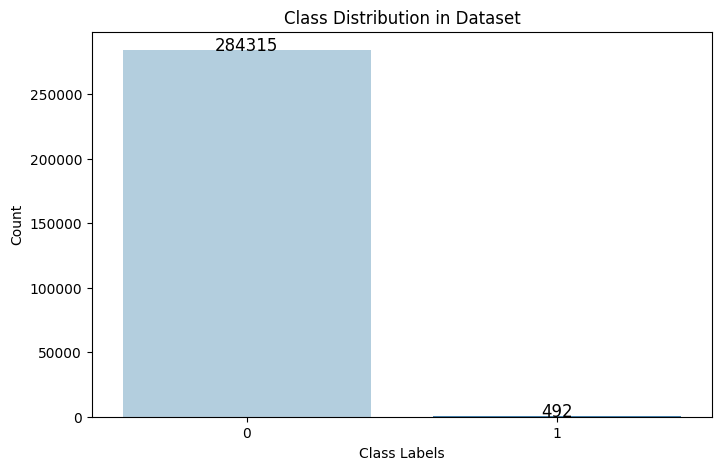

In [21]:
class_counts = df['Class'].value_counts()

plt.figure(figsize=(8, 5))

sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette="Blues", dodge=False, legend=False)

plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.title("Class Distribution in Dataset")

for i, value in enumerate(class_counts.values):
    plt.text(i, value + 1, str(value), ha='center', fontsize=12)

plt.show()

In [22]:
df_class0 = df[df['Class'] == 0]
df_class1 = df[df['Class'] == 1]

test_size_class1 = int(0.3 * len(df_class1))
df_class1_test = df_class1.sample(n=test_size_class1, random_state=42)
df_class1_train = df_class1.drop(df_class1_test.index)

df_class0_test = df_class0.sample(n=test_size_class1, random_state=42)
df_class0_train = df_class0.drop(df_class0_test.index)


df_test = pd.concat([df_class0_test, df_class1_test]).sample(frac=1, random_state=42).reset_index(drop=True)

df_train = pd.concat([df_class0_train, df_class1_train]).sample(frac=1, random_state=42).reset_index(drop=True)

X = df_train.drop('Class', axis=1)
y = df_train['Class']

smote = SMOTE(sampling_strategy={1: 1000}, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Class'])], axis=1)

class_0 = df_resampled[df_resampled['Class'] == 0]
class_1 = df_resampled[df_resampled['Class'] == 1]

class_0_downsampled = resample(class_0, replace=False, n_samples=1000, random_state=42)

df_train = pd.concat([class_0_downsampled, class_1])

df_train = df_train.sample(frac=1, random_state=42).reset_index(drop=True)


In [23]:
X_train = df_train.drop(columns=['Class'])  
y_train = df_train['Class']  

X_test = df_test.drop(columns=['Class'])  
y_test = df_test['Class']  

scaler_standard = StandardScaler()
X_train_standardized = scaler_standard.fit_transform(X_train)  
X_test_standardized = scaler_standard.transform(X_test)  

scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)


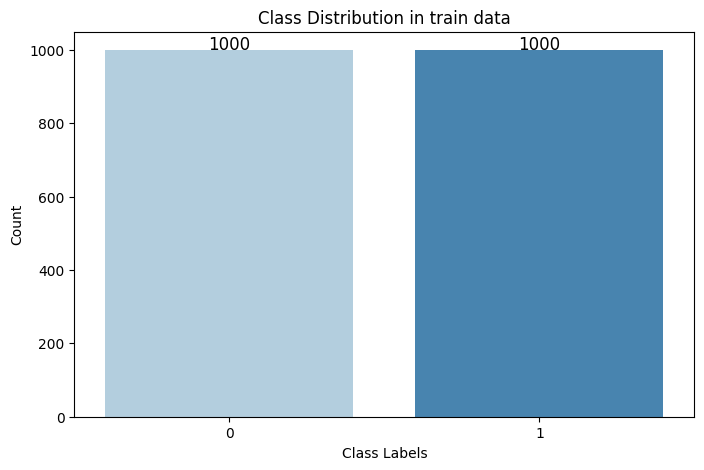

In [24]:
class_counts = y_train.value_counts()

plt.figure(figsize=(8, 5))

sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette="Blues", dodge=False, legend=False)

plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.title("Class Distribution in train data")

for i, value in enumerate(class_counts.values):
    plt.text(i, value + 1, str(value), ha='center', fontsize=12)

plt.show()

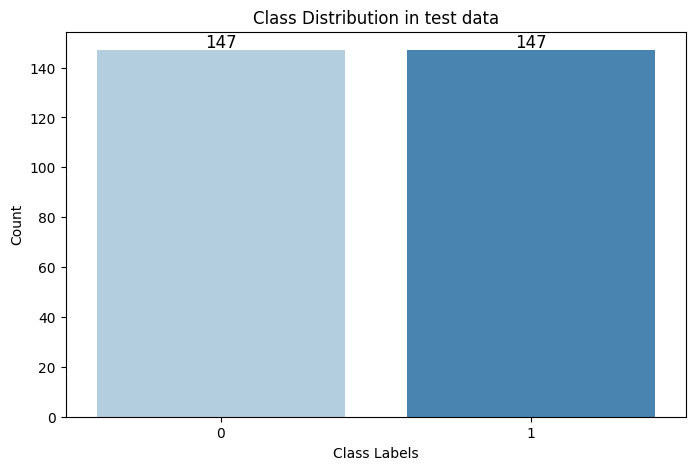

In [25]:
class_counts = y_test.value_counts()

plt.figure(figsize=(8, 5))

sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette="Blues", dodge=False, legend=False)

plt.xlabel("Class Labels")
plt.ylabel("Count")
plt.title("Class Distribution in test data")

for i, value in enumerate(class_counts.values):
    plt.text(i, value + 1, str(value), ha='center', fontsize=12)

plt.show()

### A few more steps in preprocessing 

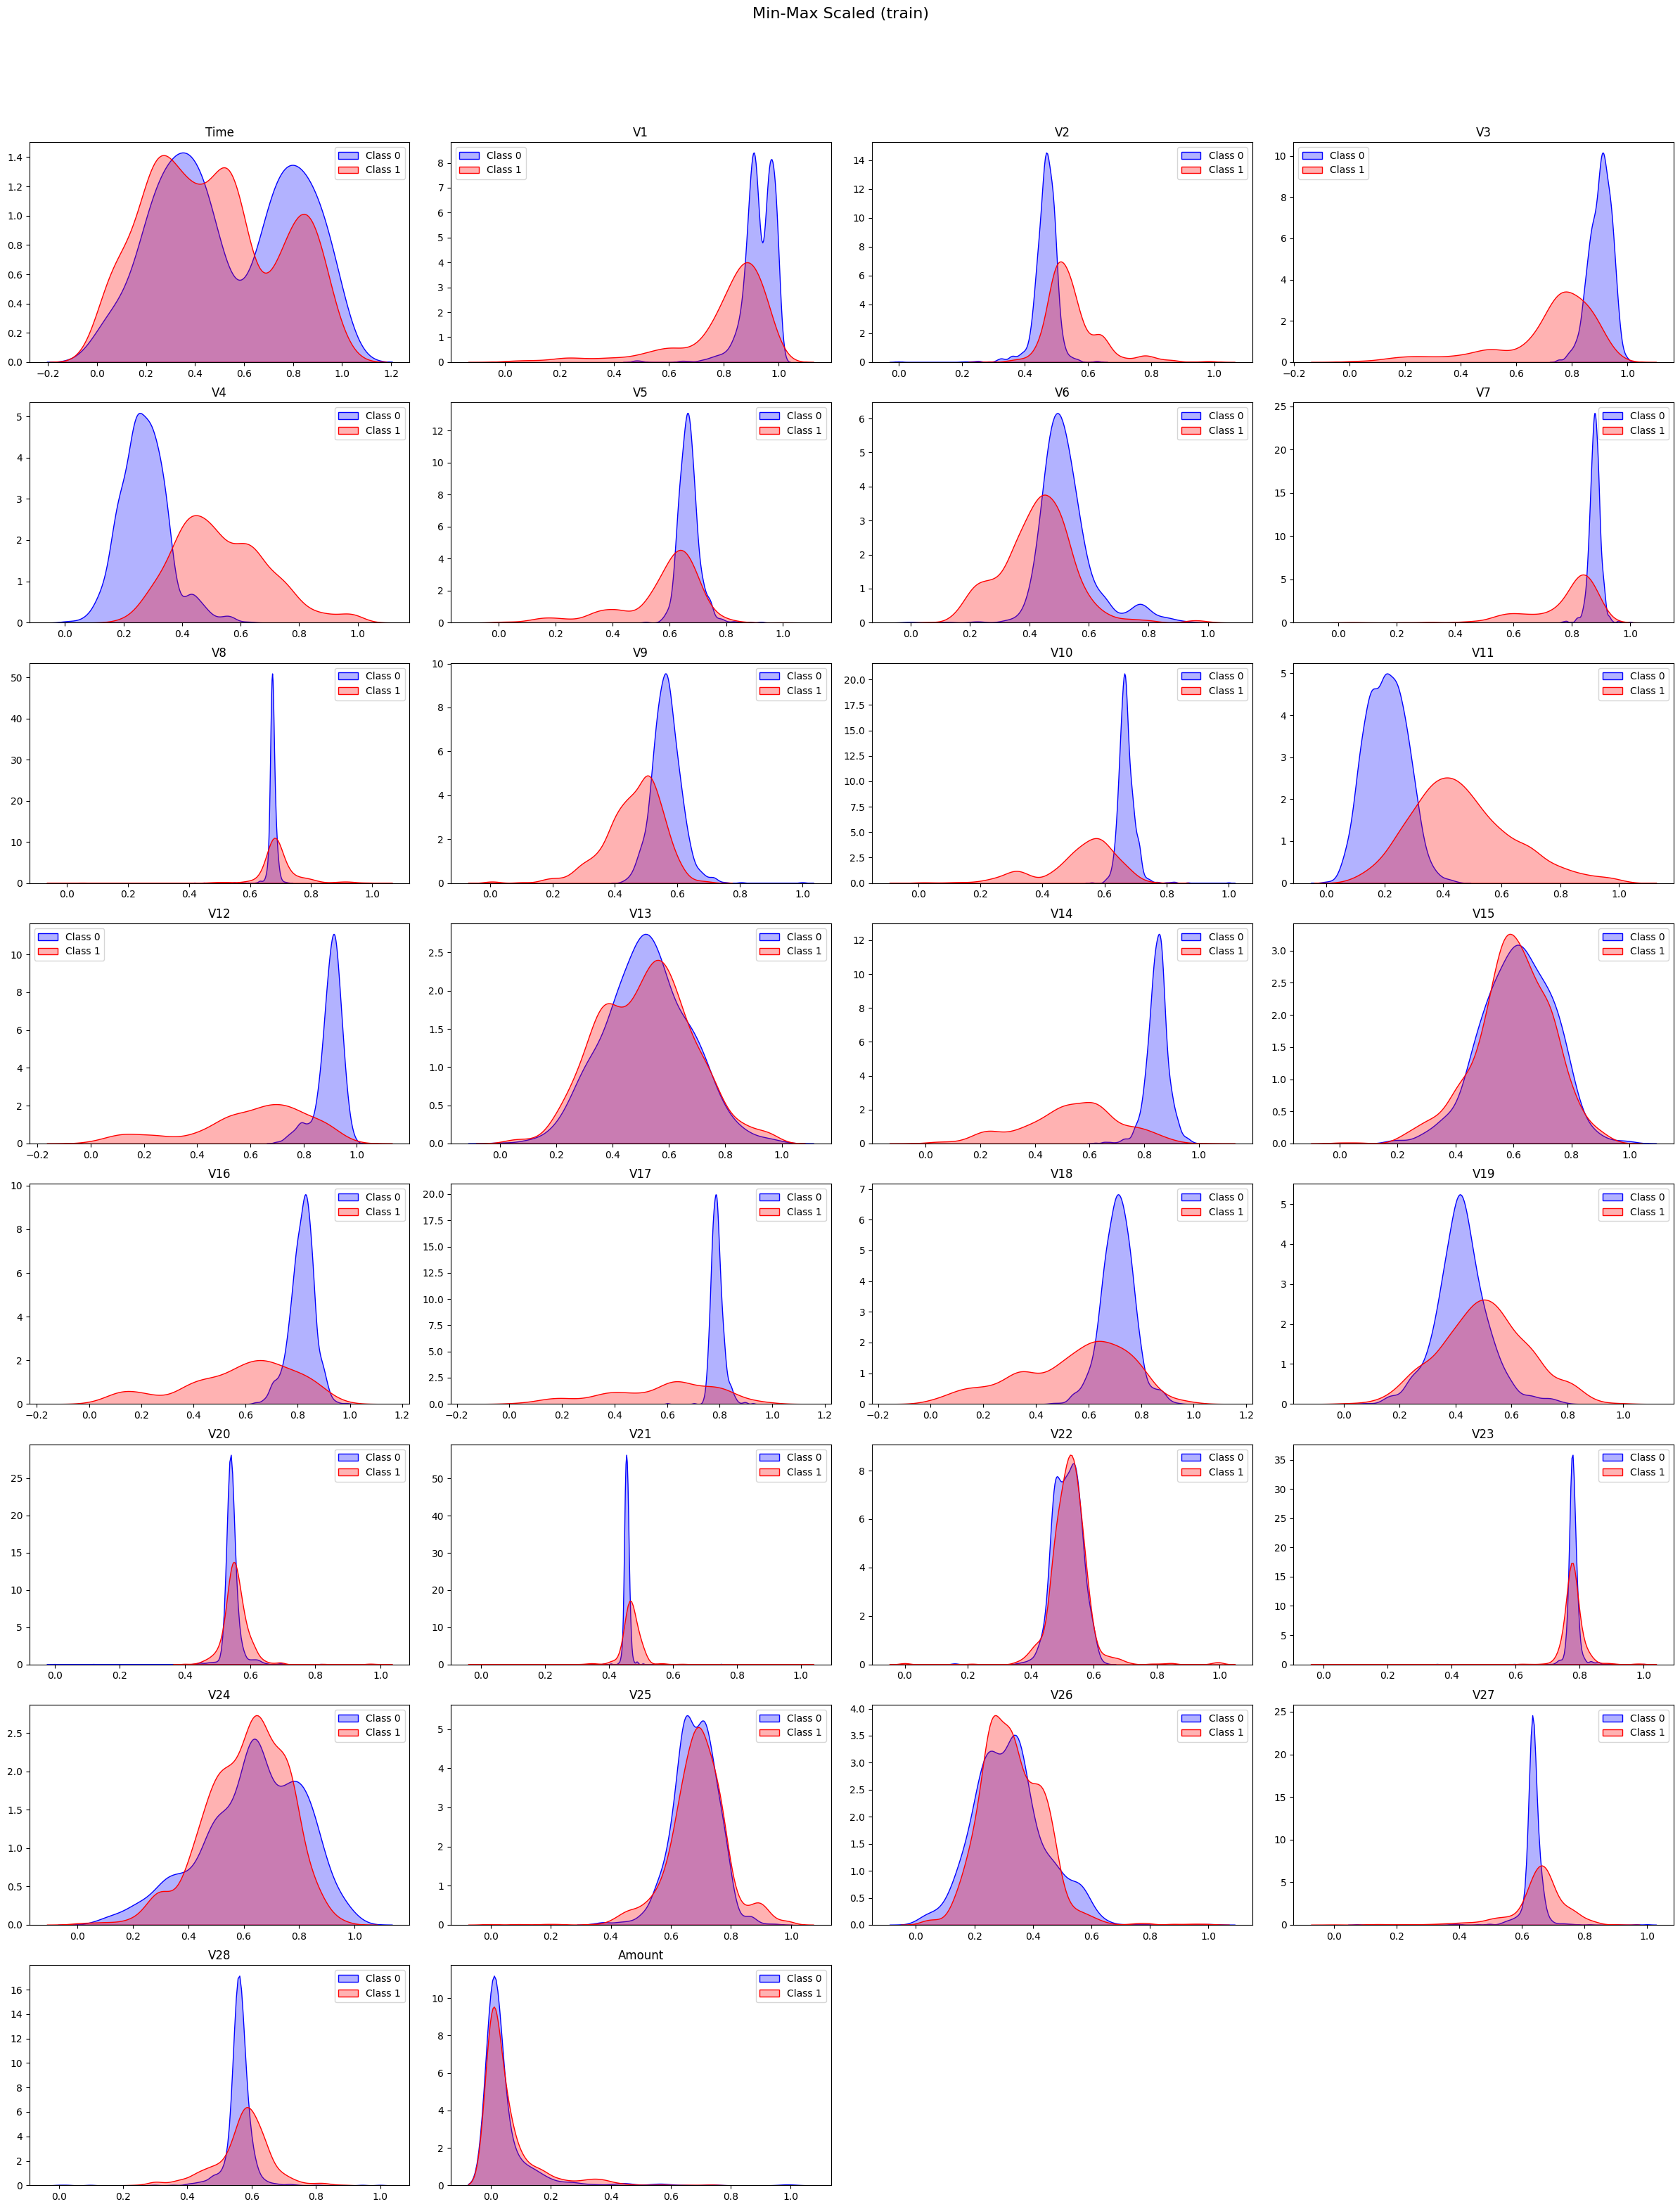

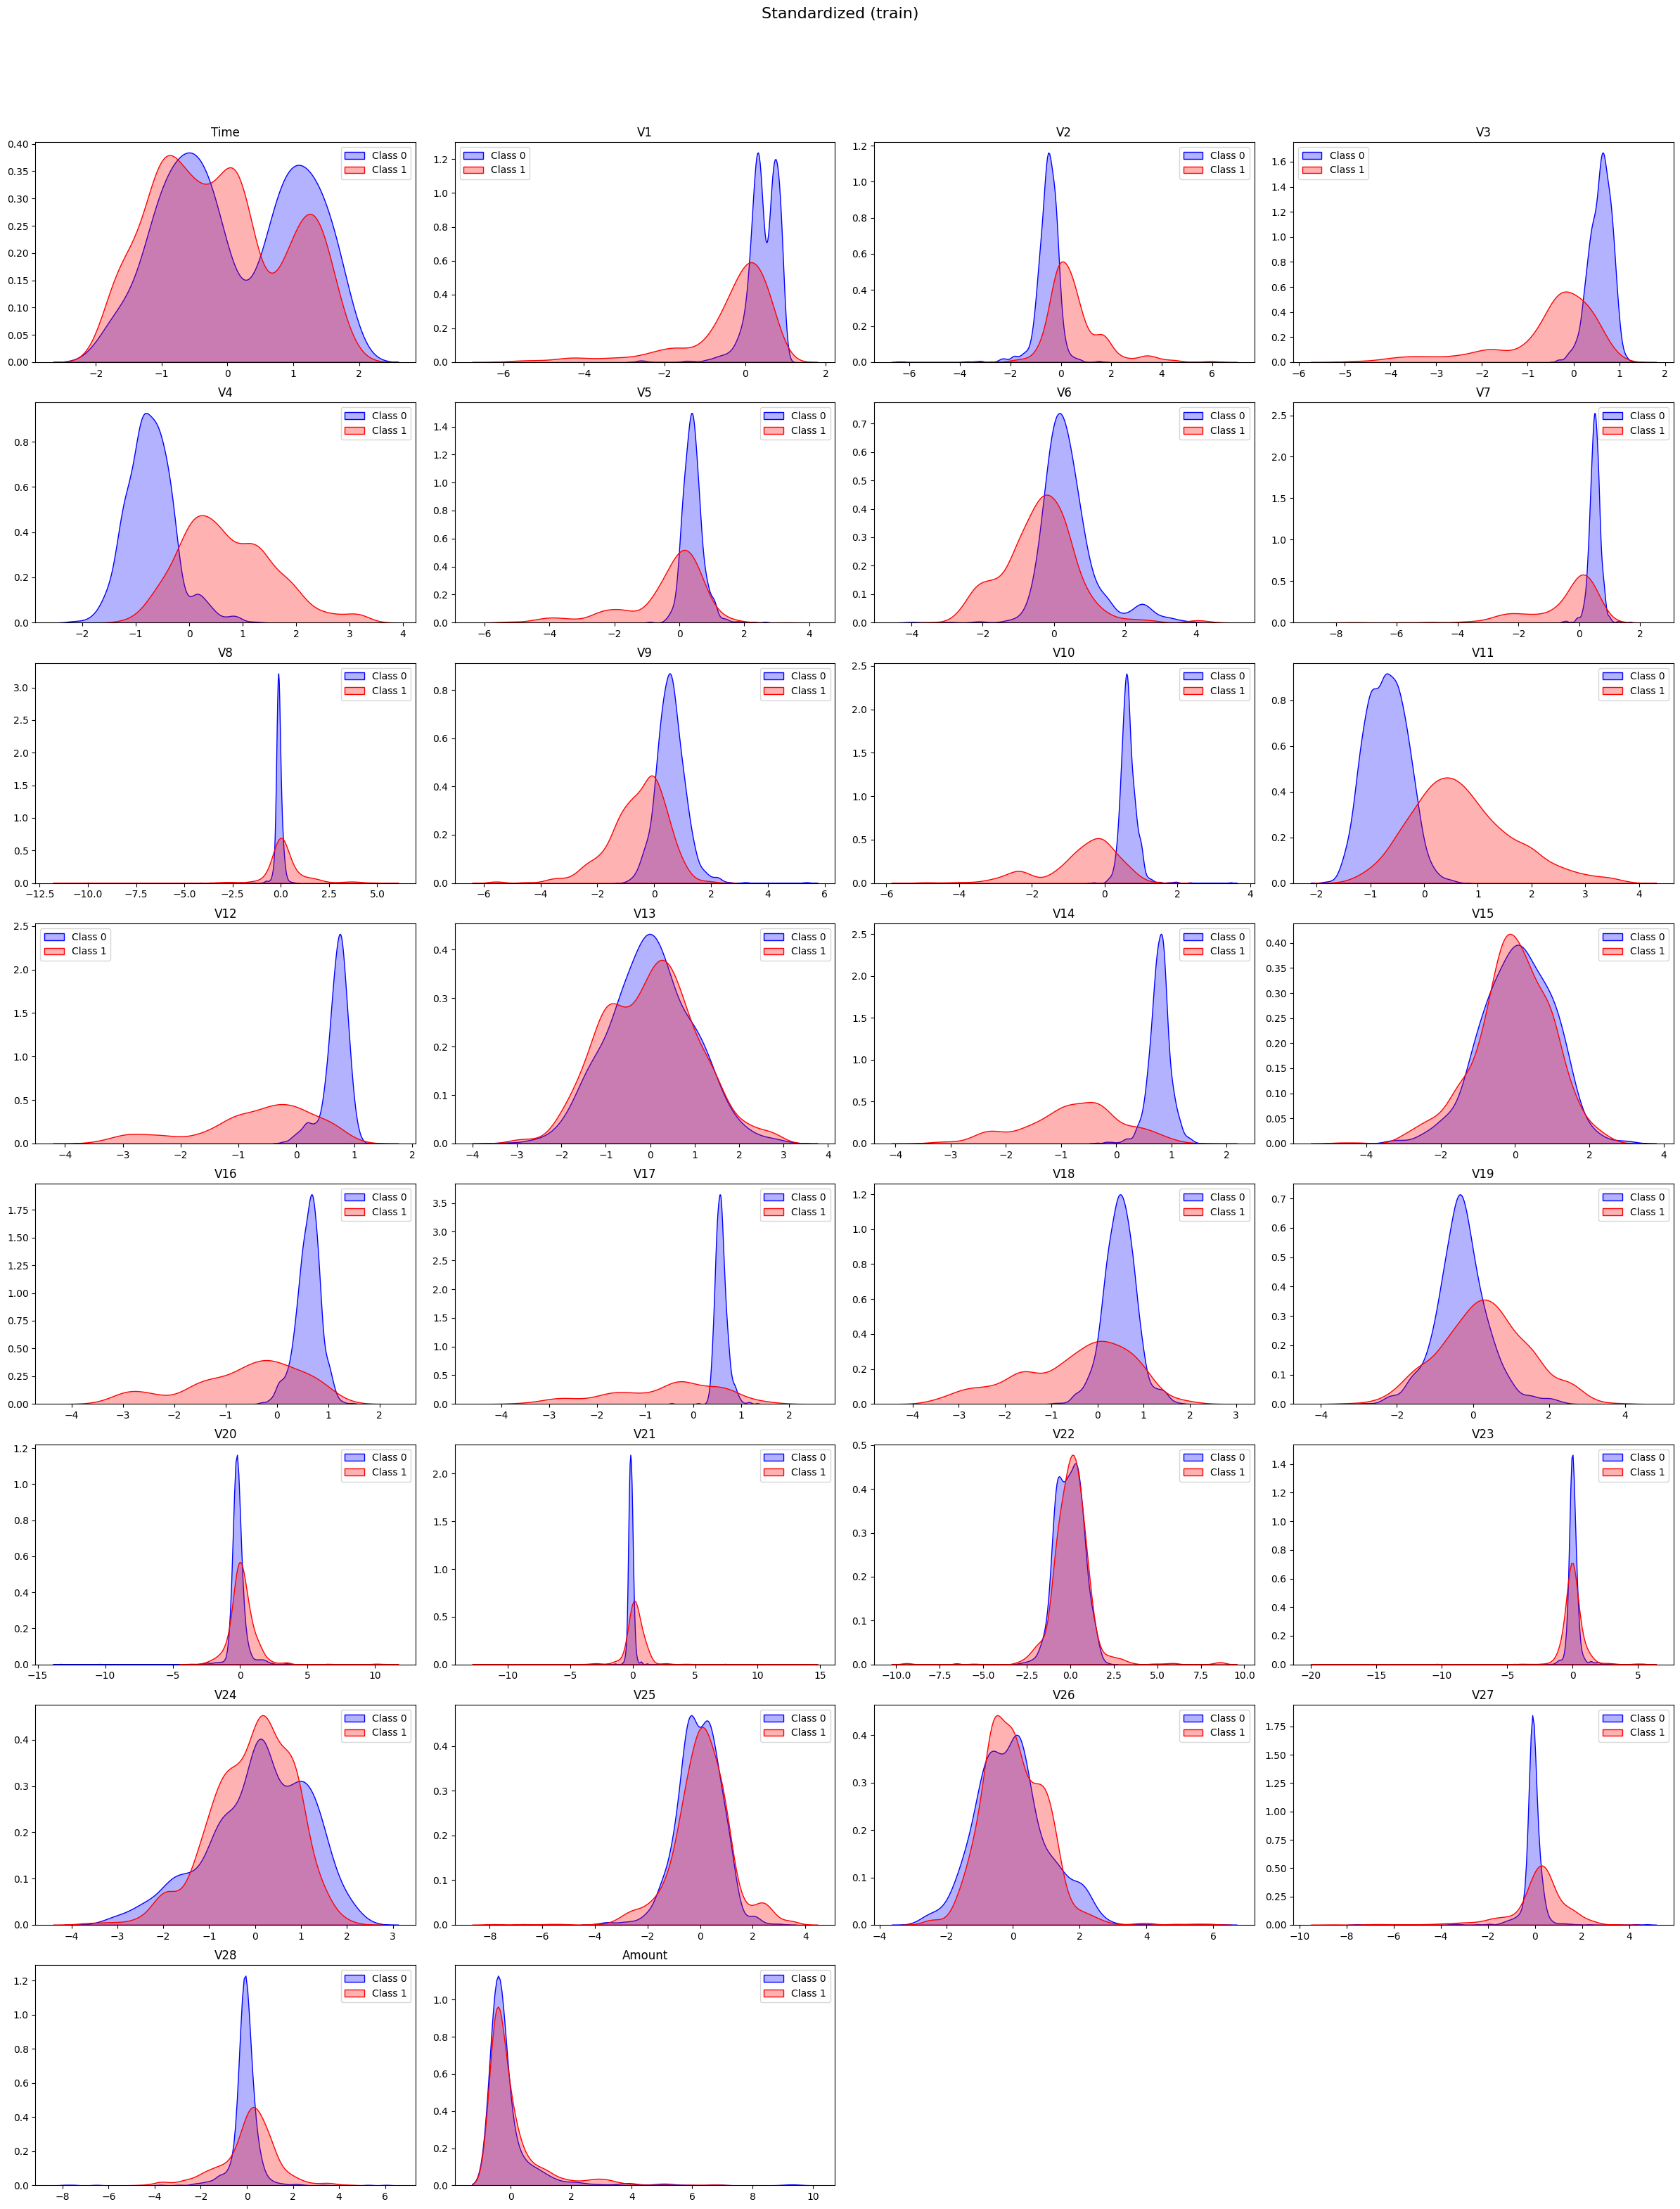

In [26]:
feature_names = X.columns.tolist()

datasets = {'Min-Max Scaled (train)': X_train_minmax, 'Standardized (train)': X_train_standardized}
num_columns = 4  
for name, X_train in datasets.items():
    num_features = X_train.shape[1]
    num_rows = (num_features + num_columns - 1) // num_columns  

    plt.figure(figsize=(num_columns * 6, num_rows * 4))  
    
    for i in range(num_features):
        plt.subplot(num_rows, num_columns, i + 1)
        sns.kdeplot(X_train[y_train == 0, i], label='Class 0', color='blue', fill=True, alpha=0.3)
        sns.kdeplot(X_train[y_train == 1, i], label='Class 1', color='red', fill=True, alpha=0.3)
        plt.title(feature_names[i])
        plt.xlabel('')
        plt.ylabel('')
        plt.legend()
    
    plt.suptitle(name, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)  
    plt.show()


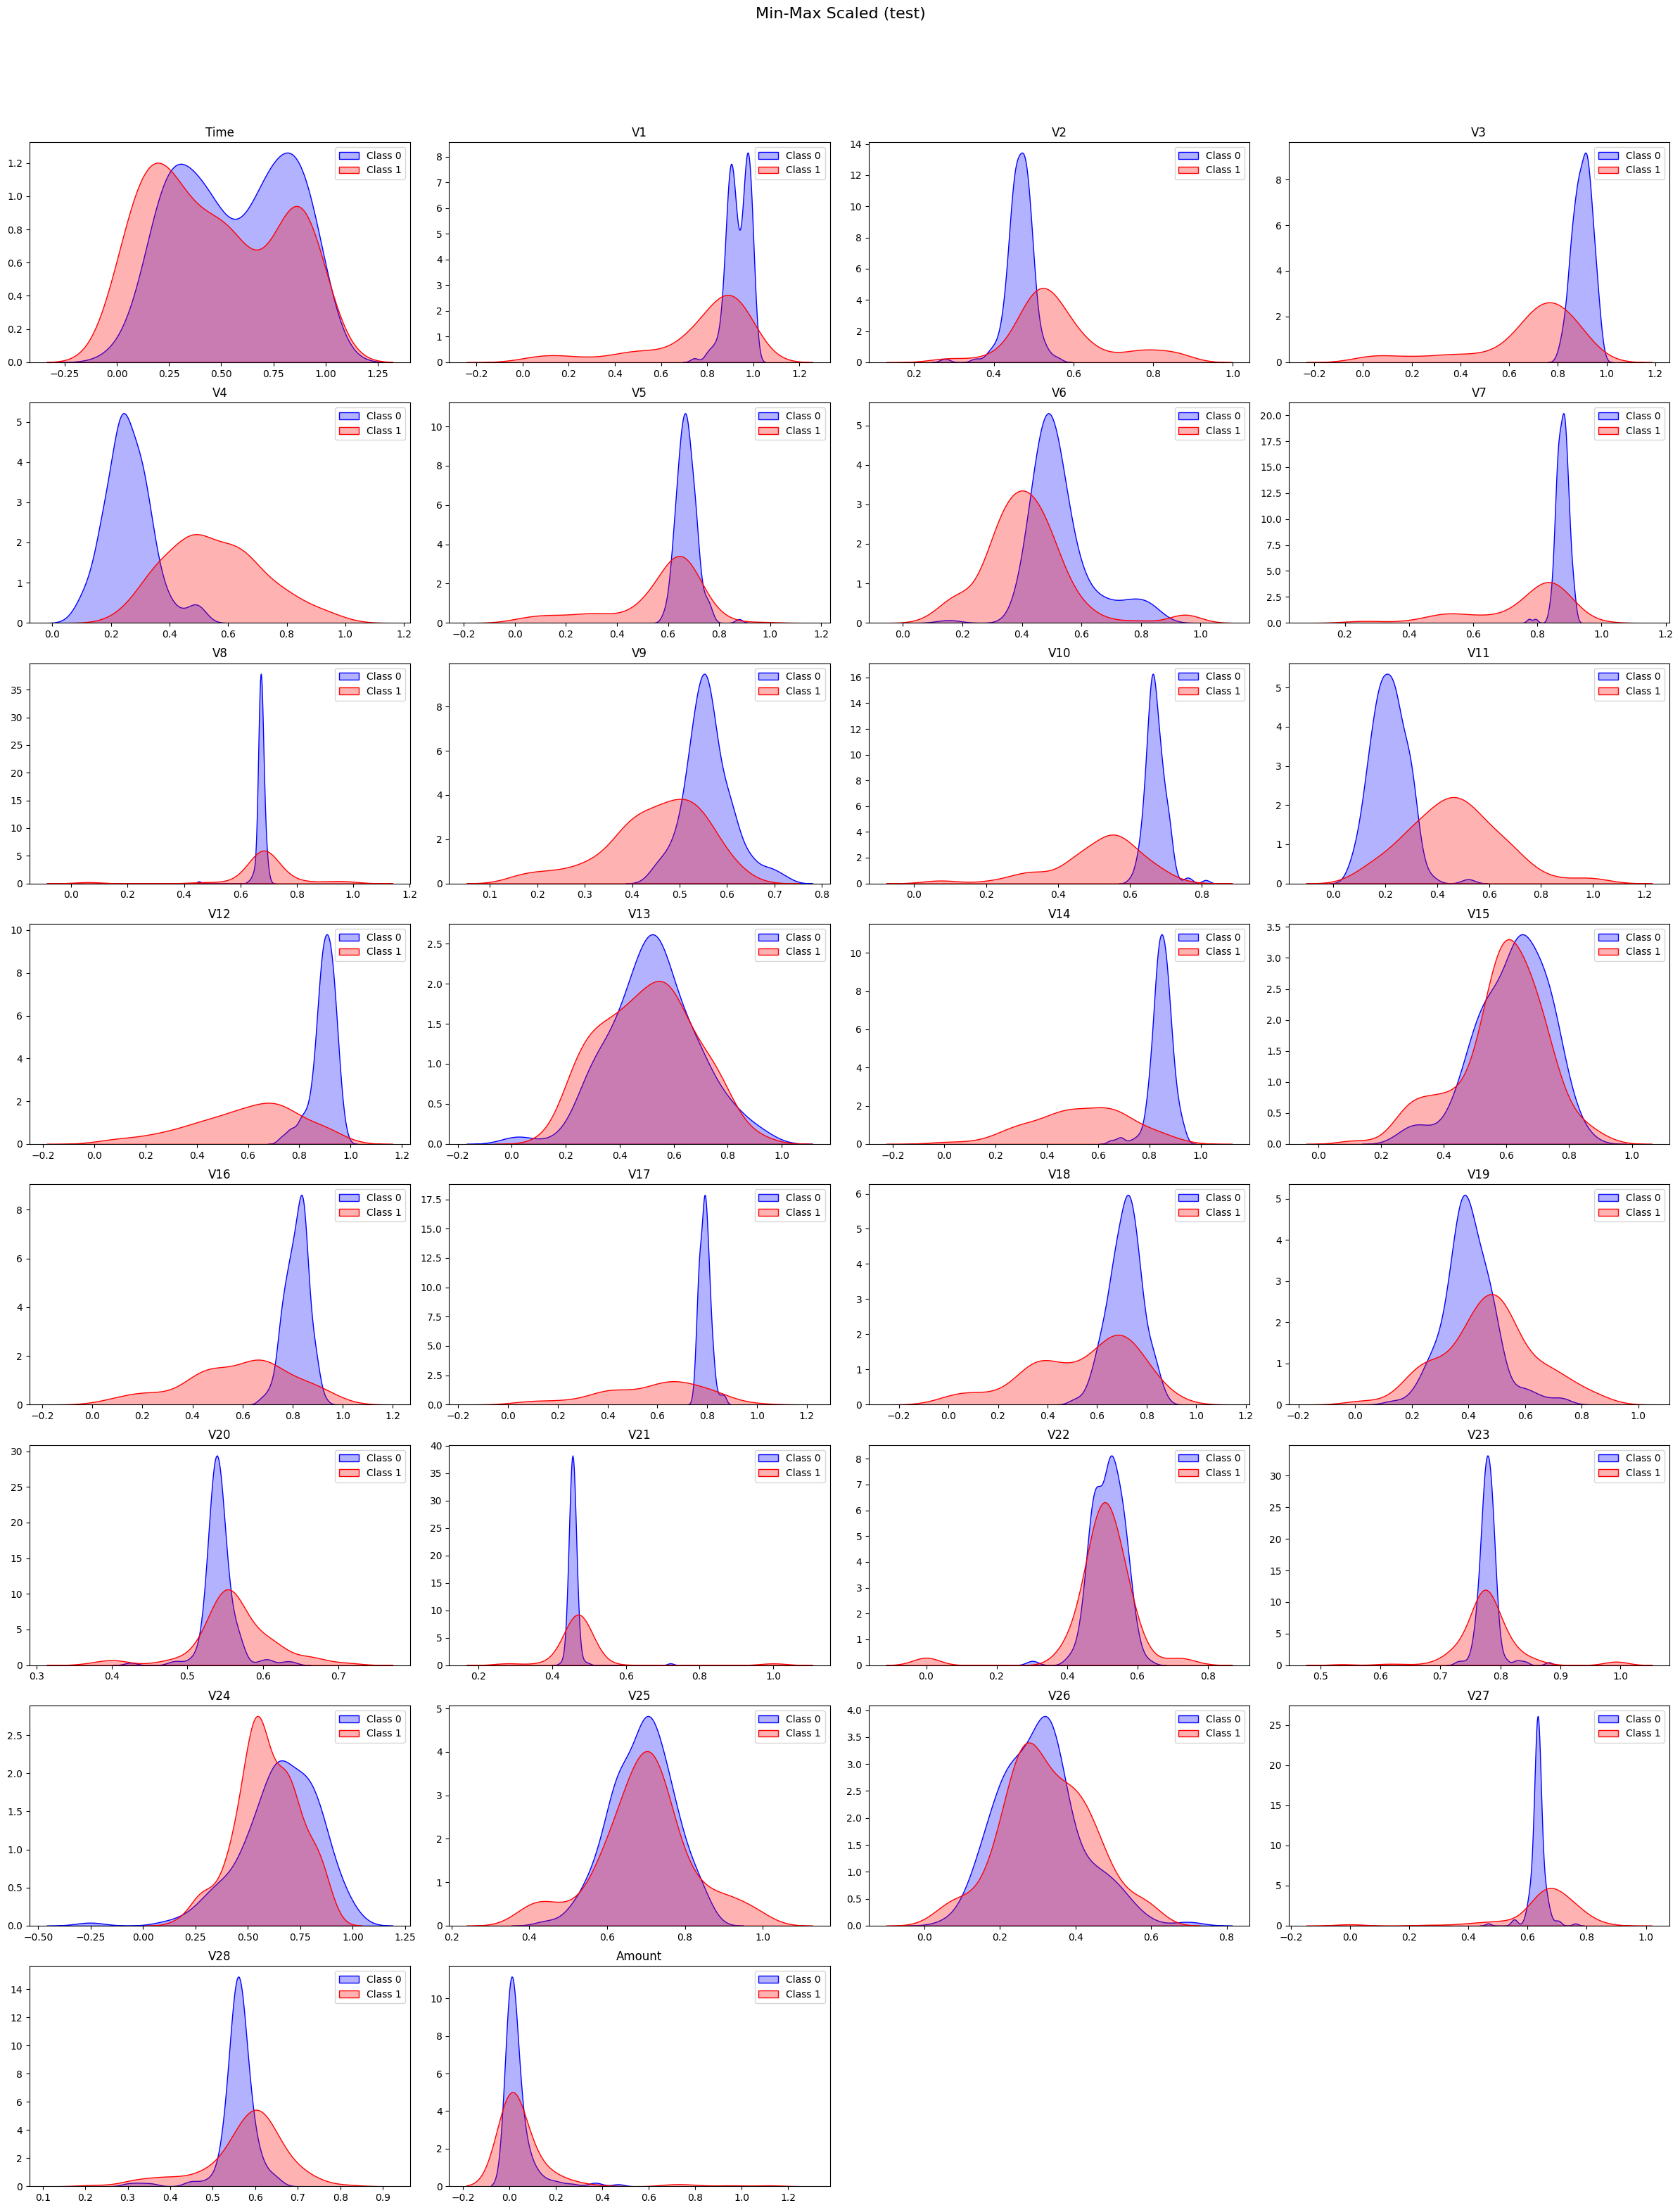

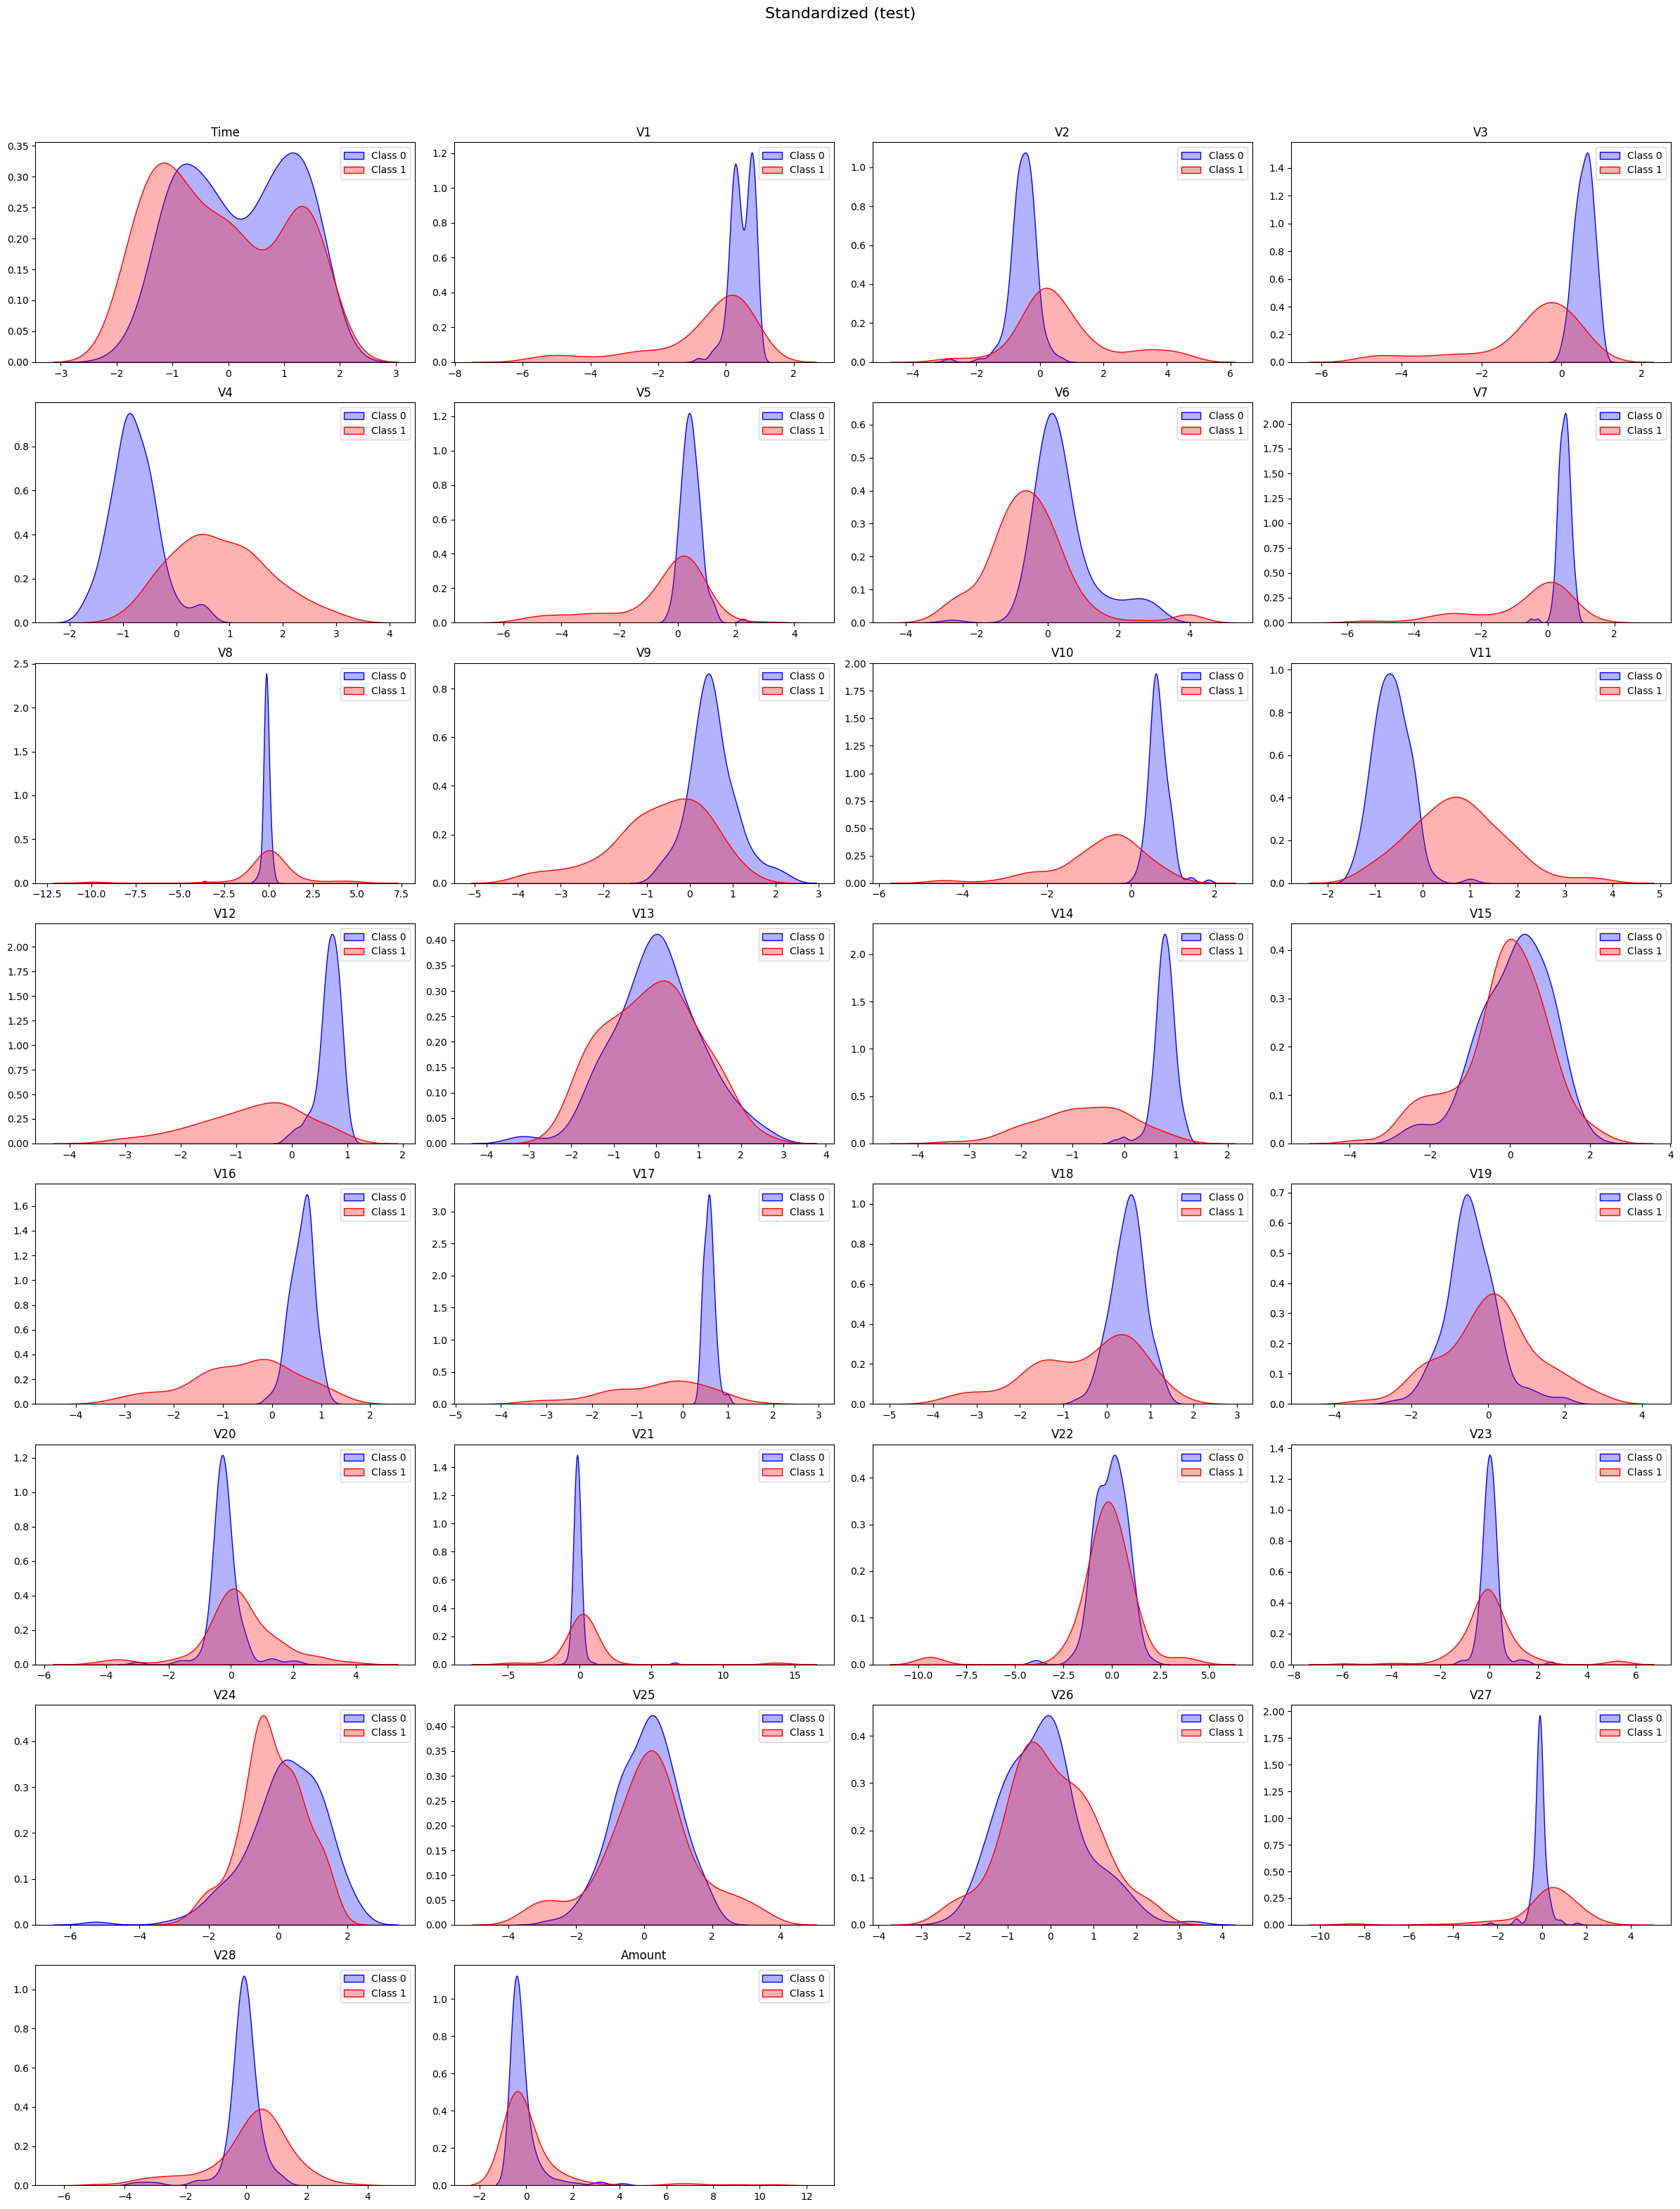

In [27]:
feature_names = X.columns.tolist()

datasets = {'Min-Max Scaled (test)': X_test_minmax, 'Standardized (test)': X_test_standardized}
num_columns = 4  
for name, X_train in datasets.items():
    num_features = X_train.shape[1]
    num_rows = (num_features + num_columns - 1) // num_columns  

    plt.figure(figsize=(num_columns * 6, num_rows * 4))  
    
    for i in range(num_features):
        plt.subplot(num_rows, num_columns, i + 1)
        sns.kdeplot(X_train[y_test == 0, i], label='Class 0', color='blue', fill=True, alpha=0.3)
        sns.kdeplot(X_train[y_test == 1, i], label='Class 1', color='red', fill=True, alpha=0.3)
        plt.title(feature_names[i])
        plt.xlabel('')
        plt.ylabel('')
        plt.legend()
    
    plt.suptitle(name, fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.92)  
    plt.show()



==================== Min-Max Scaled Data ====================


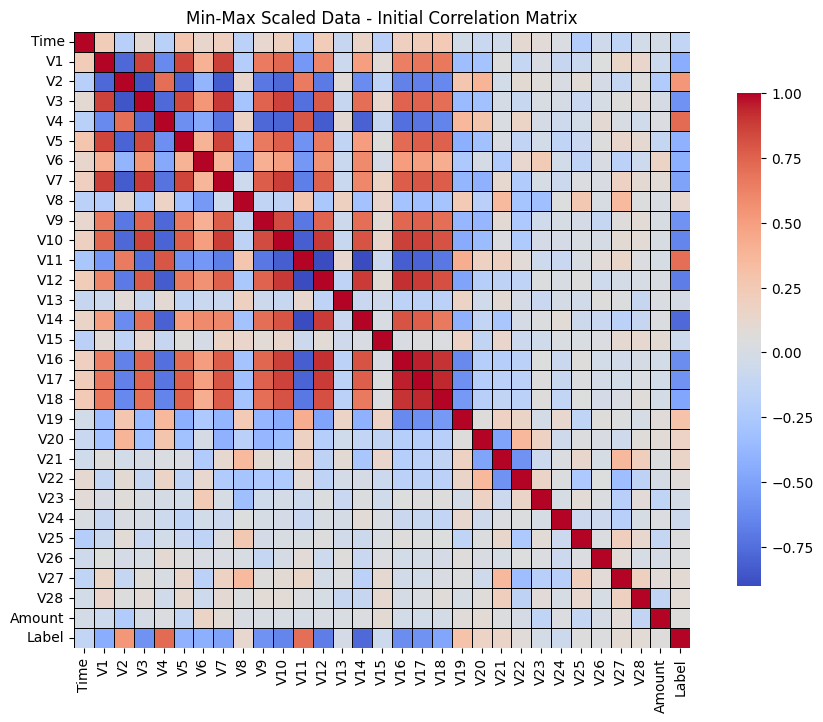

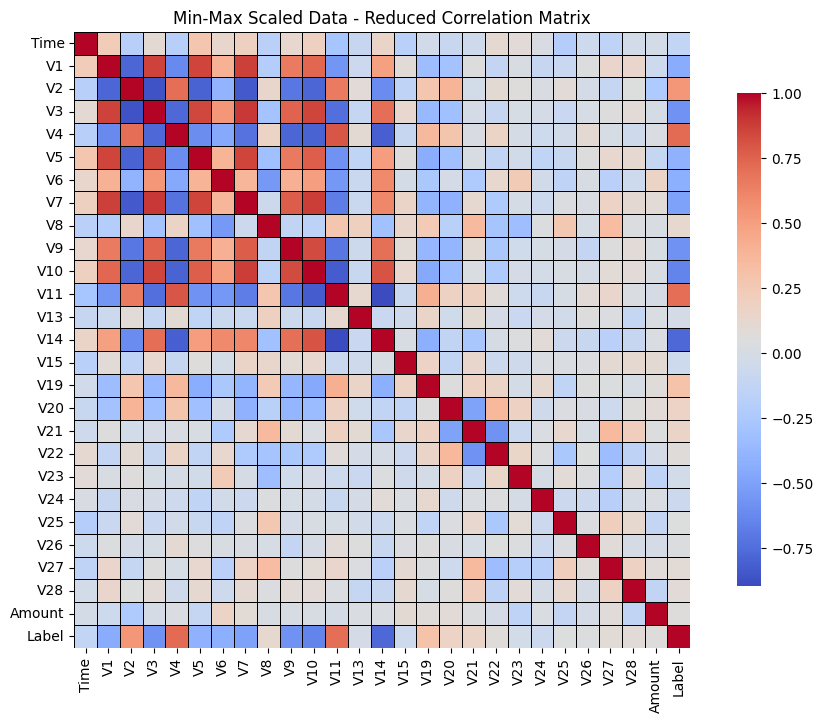

Features Removed: ['V12', 'V16', 'V17', 'V18']
Features Kept: ['Amount', 'Time', 'V1', 'V10', 'V11', 'V13', 'V14', 'V15', 'V19', 'V2', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']
Total Features Before: 30, After: 26

==================== Standardized Data ====================


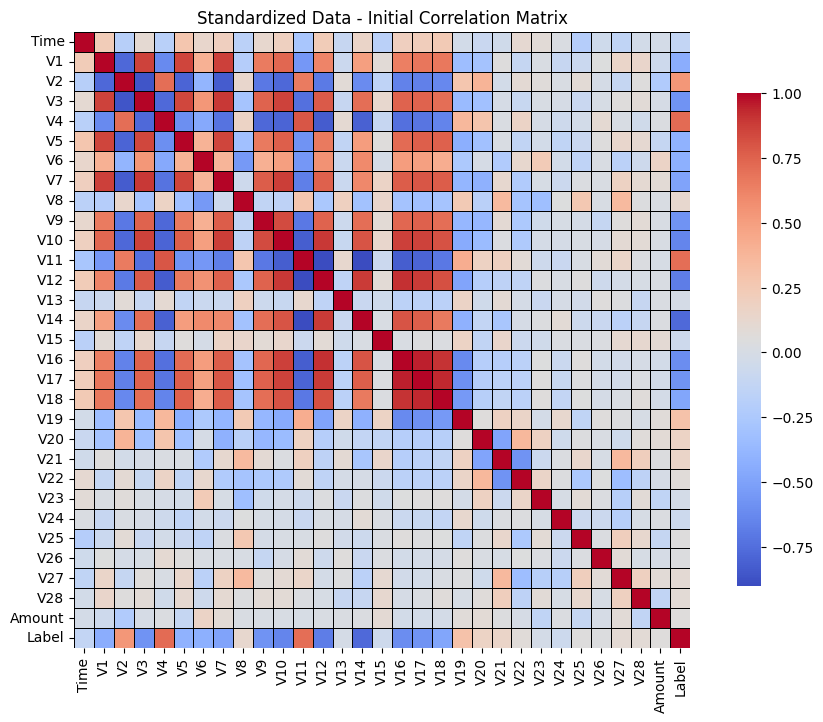

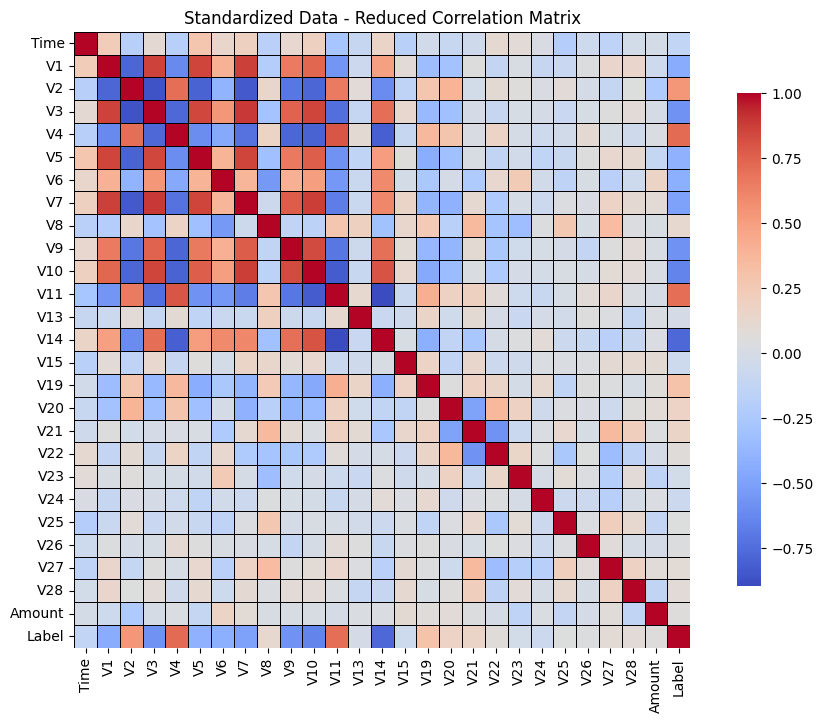

Features Removed: ['V12', 'V16', 'V17', 'V18']
Features Kept: ['Amount', 'Time', 'V1', 'V10', 'V11', 'V13', 'V14', 'V15', 'V19', 'V2', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']
Total Features Before: 30, After: 26

Final Selected Features (Min-Max Scaled): ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V13', 'V14', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
Final Selected Features (Standardized): ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V13', 'V14', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [28]:
def plot_correlation_matrix(data, title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(data, cmap='coolwarm', cbar_kws={'shrink': 0.8}, linewidths=0.5, linecolor='black', square=True)
    plt.title(title)
    plt.show()

def feature_selection(X, y, feature_names, dataset_name):
    print(f"\n{'='*20} {dataset_name} {'='*20}")

    df = pd.DataFrame(X, columns=feature_names)
    y = pd.Series(y, name='Label')
    
    df_with_label = pd.concat([df, y], axis=1)

    initial_corr_matrix = df_with_label.corr()
    plot_correlation_matrix(initial_corr_matrix, f"{dataset_name} - Initial Correlation Matrix")

    threshold = 0.9 
    to_drop = set()

    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            if abs(initial_corr_matrix.iloc[i, j]) > threshold:

                corr_with_label_i = abs(initial_corr_matrix.iloc[i, -1])
                corr_with_label_j = abs(initial_corr_matrix.iloc[j, -1])

                if corr_with_label_i < corr_with_label_j:
                    to_drop.add(feature_names[i])
                else:
                    to_drop.add(feature_names[j])

    df_reduced = df.drop(columns=to_drop)

    df_reduced_with_label = pd.concat([df_reduced, y], axis=1)
    reduced_corr_matrix = df_reduced_with_label.corr()
    plot_correlation_matrix(reduced_corr_matrix, f"{dataset_name} - Reduced Correlation Matrix")

    print("Features Removed:", sorted(to_drop))
    print("Features Kept:", sorted(df_reduced.columns.tolist()))
    print(f"Total Features Before: {len(feature_names)}, After: {df_reduced.shape[1]}")

    return df_reduced, to_drop

X_minmax_selected, dropped_minmax = feature_selection(X_train_minmax, y_train, feature_names, "Min-Max Scaled Data")
X_standardized_selected, dropped_standardized = feature_selection(X_train_standardized, y_train, feature_names, "Standardized Data")

print("\nFinal Selected Features (Min-Max Scaled):", X_minmax_selected.columns.tolist())
print("Final Selected Features (Standardized):", X_standardized_selected.columns.tolist())



==================== Min-Max Scaled Data (RF) ====================


C:\Users\armin\AppData\Local\Temp\ipykernel_8908\2449272294.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis', legend=False)


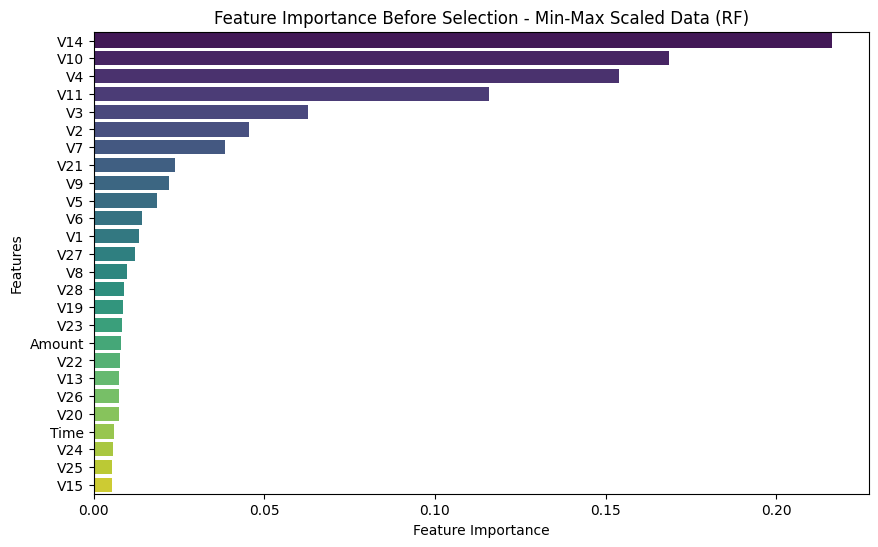

C:\Users\armin\AppData\Local\Temp\ipykernel_8908\2449272294.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df[:top_n], x='Importance', y='Feature', palette='viridis', legend=False)


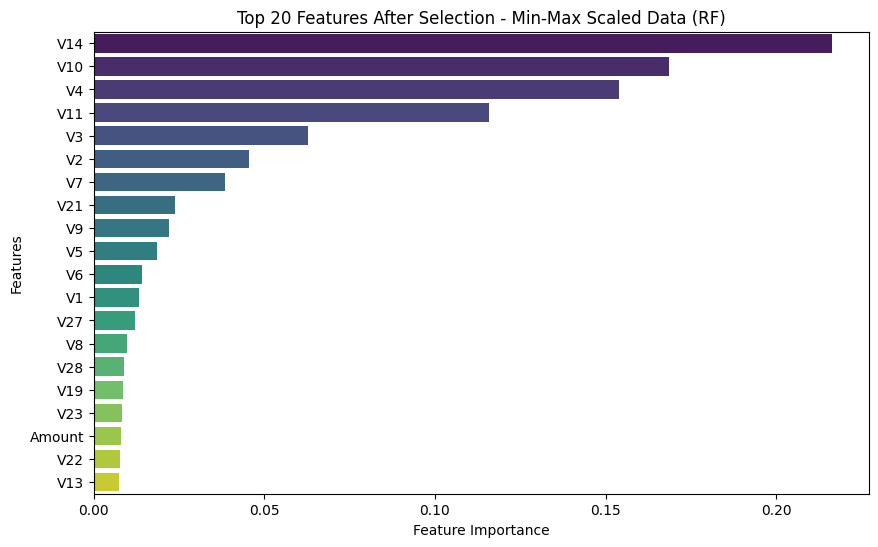

Features Kept (Min-Max Scaled Data (RF)): ['Amount', 'V1', 'V10', 'V11', 'V13', 'V14', 'V19', 'V2', 'V21', 'V22', 'V23', 'V27', 'V28', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']
Total Features Before: 26, After: 20

==================== Standardized Data (RF) ====================


C:\Users\armin\AppData\Local\Temp\ipykernel_8908\2449272294.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis', legend=False)


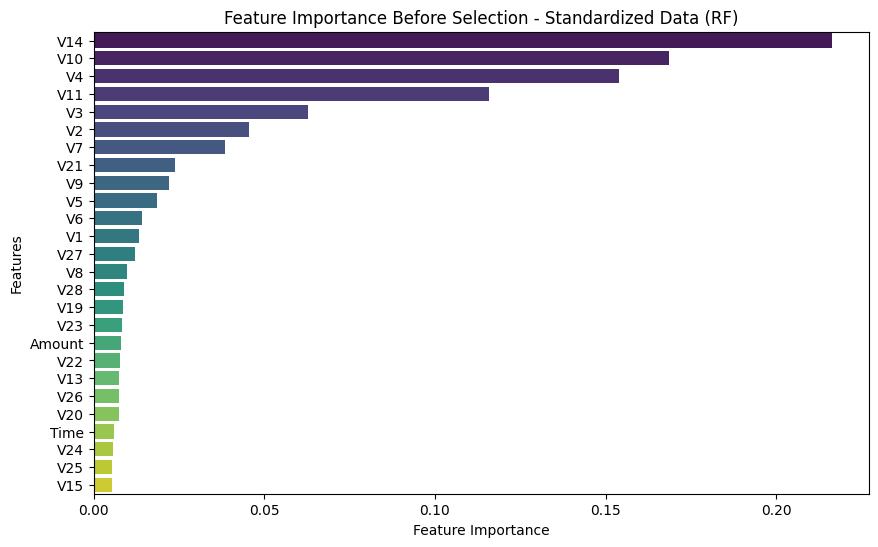

C:\Users\armin\AppData\Local\Temp\ipykernel_8908\2449272294.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df[:top_n], x='Importance', y='Feature', palette='viridis', legend=False)


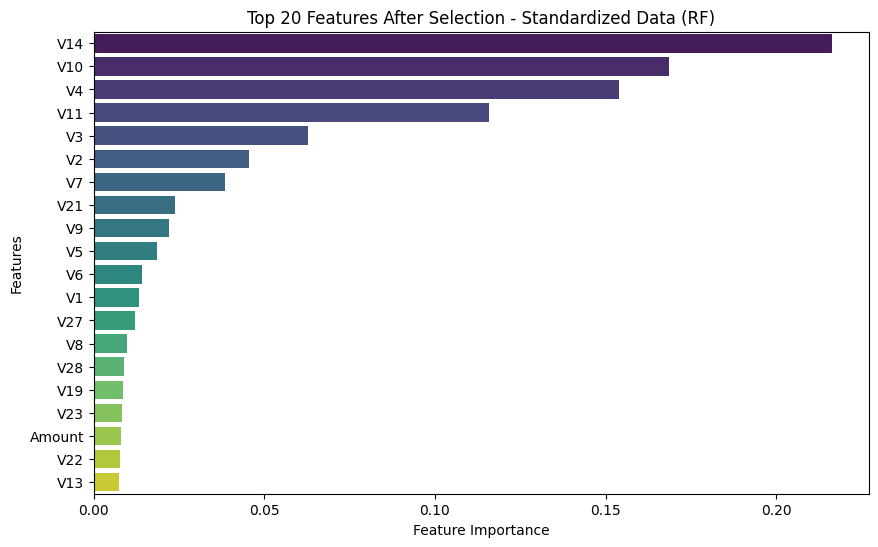

Features Kept (Standardized Data (RF)): ['Amount', 'V1', 'V10', 'V11', 'V13', 'V14', 'V19', 'V2', 'V21', 'V22', 'V23', 'V27', 'V28', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']
Total Features Before: 26, After: 20


In [29]:
def feature_selection_random_forest(X, y, dataset_name, n_estimators=100, top_n=20):

    print(f"\n{'='*20} {dataset_name} {'='*20}")

    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X, y)

    feature_importances = rf.feature_importances_

    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis', legend=False)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title(f"Feature Importance Before Selection - {dataset_name}")
    plt.show()

    selected_features = feature_importance_df['Feature'][:top_n].tolist()

    X_selected = X[selected_features]

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance_df[:top_n], x='Importance', y='Feature', palette='viridis', legend=False)
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title(f"Top {top_n} Features After Selection - {dataset_name}")
    plt.show()

    print(f"Features Kept ({dataset_name}):", sorted(selected_features))
    print(f"Total Features Before: {X.shape[1]}, After: {X_selected.shape[1]}")

    return X_selected , selected_features

X_minmax_rf_selected , X_minmax_final_features = feature_selection_random_forest(X_minmax_selected, y_train, "Min-Max Scaled Data (RF)")
X_standardized_rf_selected , X_standardized_final_features = feature_selection_random_forest(X_standardized_selected, y_train, "Standardized Data (RF)")



### part3 : Design and implementation of a simple MLP network


Training model: MinMax, No Dropout, No Regularization
Epoch [10/40], Loss: 0.1811, Test Loss: 0.1759, Accuracy: 0.9520
Epoch [20/40], Loss: 0.1461, Test Loss: 0.1465, Accuracy: 0.9495
Epoch [30/40], Loss: 0.1374, Test Loss: 0.1322, Accuracy: 0.9515
Epoch [40/40], Loss: 0.1330, Test Loss: 0.1286, Accuracy: 0.9535
Best epoch for MinMax, No Dropout, No Regularization: 40


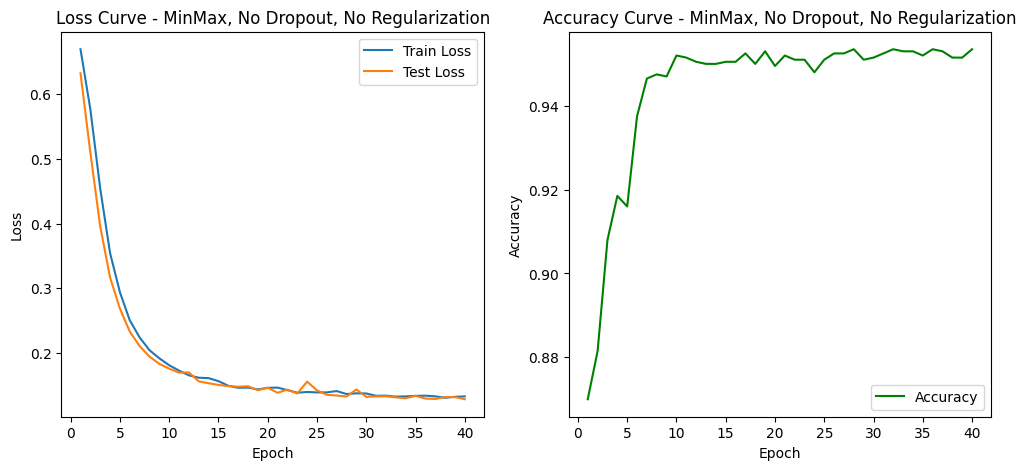


Training model: MinMax, No Dropout, With Regularization
Epoch [10/40], Loss: 0.1774, Test Loss: 0.1760, Accuracy: 0.9520
Epoch [20/40], Loss: 0.1404, Test Loss: 0.1408, Accuracy: 0.9520
Epoch [30/40], Loss: 0.1334, Test Loss: 0.1416, Accuracy: 0.9505
Epoch [40/40], Loss: 0.1323, Test Loss: 0.1294, Accuracy: 0.9530
Best epoch for MinMax, No Dropout, With Regularization: 38


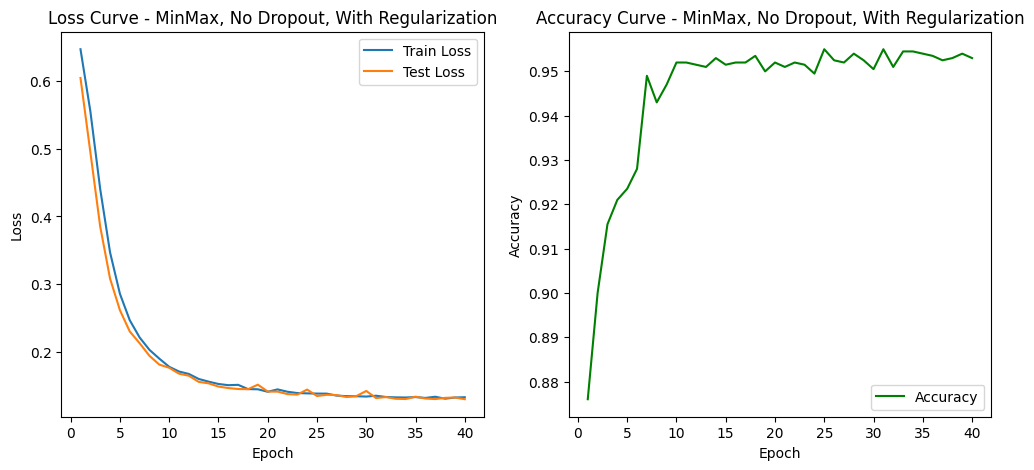


Training model: MinMax, With Dropout, No Regularization
Epoch [10/40], Loss: 0.2091, Test Loss: 0.1896, Accuracy: 0.9425
Epoch [20/40], Loss: 0.1573, Test Loss: 0.1452, Accuracy: 0.9525
Epoch [30/40], Loss: 0.1407, Test Loss: 0.1356, Accuracy: 0.9520
Epoch [40/40], Loss: 0.1380, Test Loss: 0.1307, Accuracy: 0.9535
Best epoch for MinMax, With Dropout, No Regularization: 40


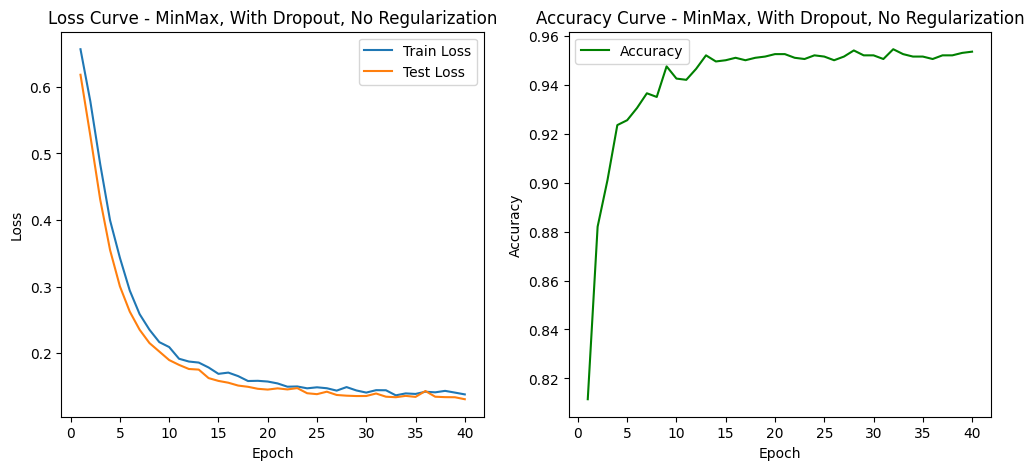


Training model: MinMax, With Dropout, With Regularization
Epoch [10/40], Loss: 0.2011, Test Loss: 0.1877, Accuracy: 0.9445
Epoch [20/40], Loss: 0.1520, Test Loss: 0.1445, Accuracy: 0.9520
Epoch [30/40], Loss: 0.1407, Test Loss: 0.1344, Accuracy: 0.9540
Epoch [40/40], Loss: 0.1343, Test Loss: 0.1334, Accuracy: 0.9530
Best epoch for MinMax, With Dropout, With Regularization: 36


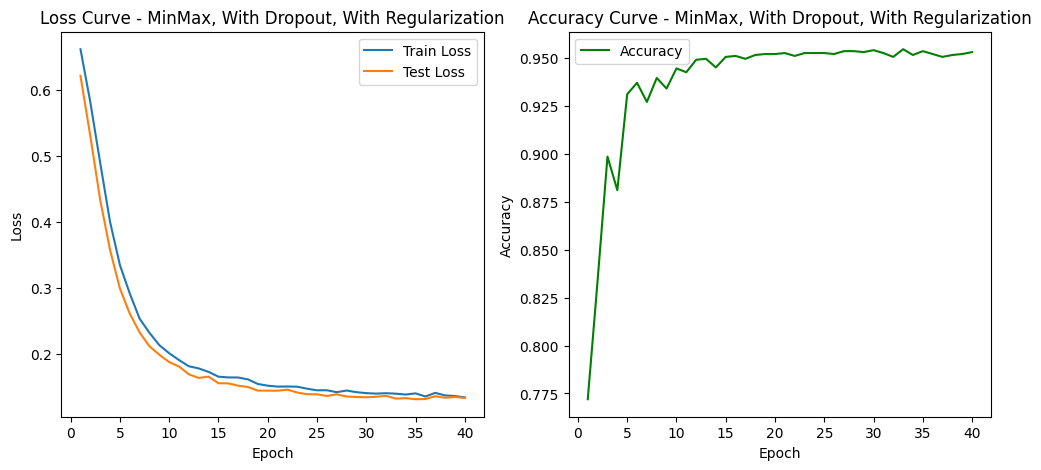


Training model: Standardized, No Dropout, No Regularization
Epoch [10/40], Loss: 0.1118, Test Loss: 0.1082, Accuracy: 0.9625
Epoch [20/40], Loss: 0.0924, Test Loss: 0.0907, Accuracy: 0.9680
Epoch [30/40], Loss: 0.0838, Test Loss: 0.0801, Accuracy: 0.9695
Epoch [40/40], Loss: 0.0742, Test Loss: 0.0735, Accuracy: 0.9725
Best epoch for Standardized, No Dropout, No Regularization: 39


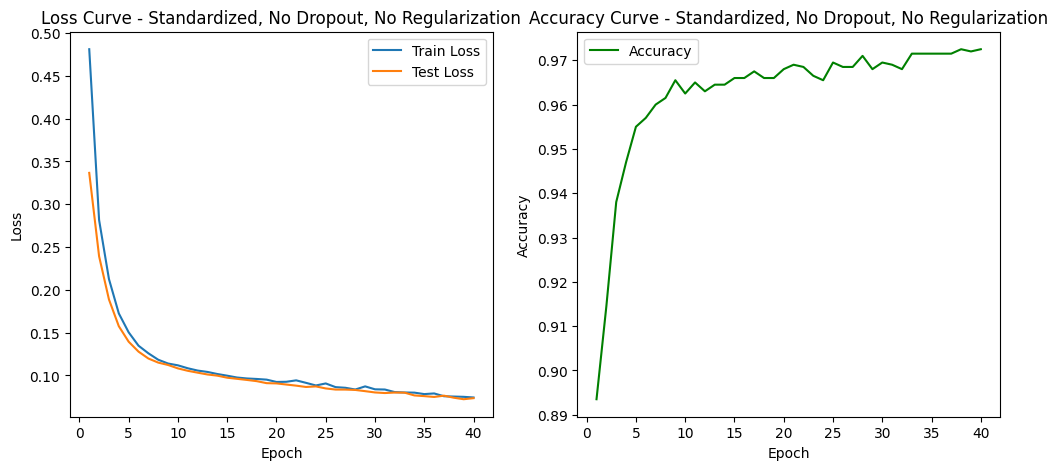


Training model: Standardized, No Dropout, With Regularization
Epoch [10/40], Loss: 0.1145, Test Loss: 0.1108, Accuracy: 0.9625
Epoch [20/40], Loss: 0.0948, Test Loss: 0.0921, Accuracy: 0.9655
Epoch [30/40], Loss: 0.0825, Test Loss: 0.0806, Accuracy: 0.9695
Epoch [40/40], Loss: 0.0729, Test Loss: 0.0703, Accuracy: 0.9725
Best epoch for Standardized, No Dropout, With Regularization: 40


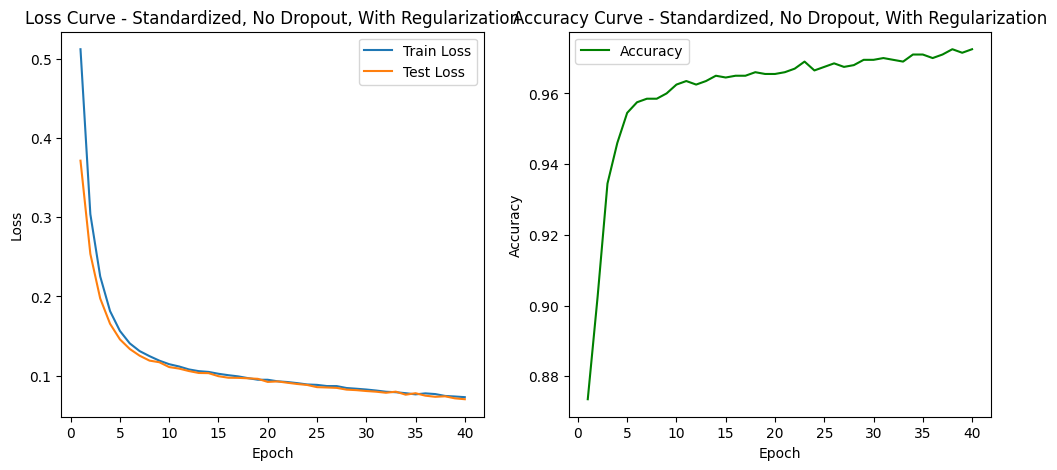


Training model: Standardized, With Dropout, No Regularization
Epoch [10/40], Loss: 0.1232, Test Loss: 0.1137, Accuracy: 0.9615
Epoch [20/40], Loss: 0.1051, Test Loss: 0.0952, Accuracy: 0.9670
Epoch [30/40], Loss: 0.0922, Test Loss: 0.0849, Accuracy: 0.9665
Epoch [40/40], Loss: 0.0839, Test Loss: 0.0774, Accuracy: 0.9695
Best epoch for Standardized, With Dropout, No Regularization: 40


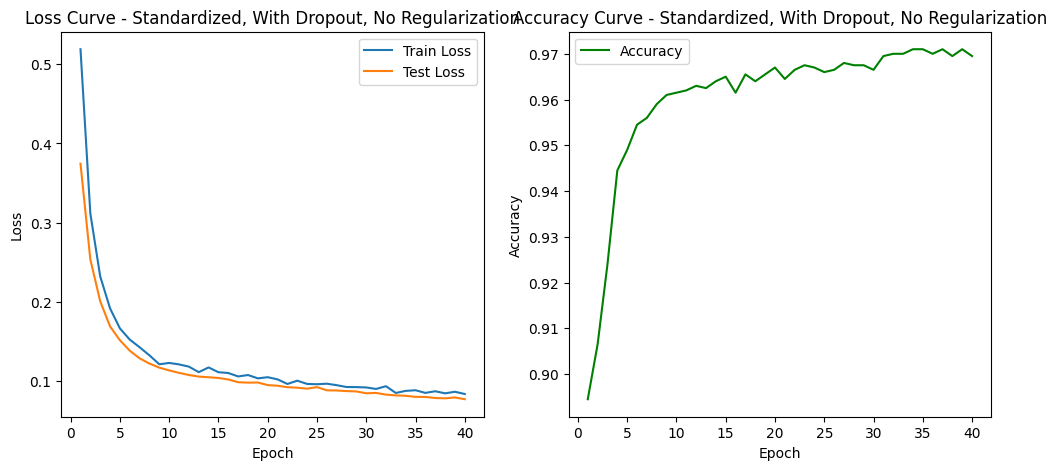


Training model: Standardized, With Dropout, With Regularization
Epoch [10/40], Loss: 0.1203, Test Loss: 0.1106, Accuracy: 0.9615
Epoch [20/40], Loss: 0.1038, Test Loss: 0.0953, Accuracy: 0.9655
Epoch [30/40], Loss: 0.0941, Test Loss: 0.0862, Accuracy: 0.9670
Epoch [40/40], Loss: 0.0908, Test Loss: 0.0786, Accuracy: 0.9720
Best epoch for Standardized, With Dropout, With Regularization: 39


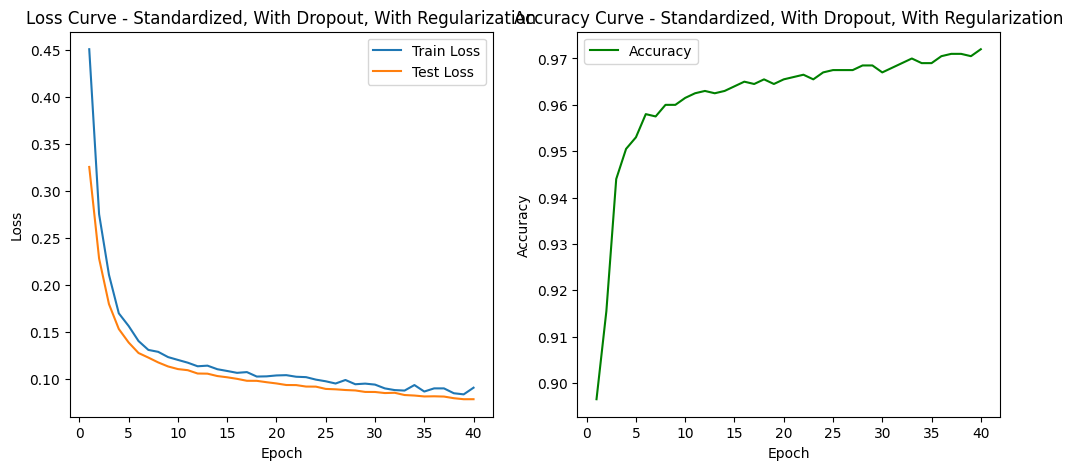

In [30]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_minmax_rf_selected = torch.tensor(np.array(X_minmax_rf_selected), dtype=torch.float32).to(device)
y_train = torch.tensor(np.array(y_train), dtype=torch.float32).to(device)
X_standardized_rf_selected = torch.tensor(np.array(X_standardized_rf_selected), dtype=torch.float32).to(device)


batch_size = 32

def create_dataloader(X, y):
    dataset = TensorDataset(X, y)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

train_loader_minmax = create_dataloader(X_minmax_rf_selected, y_train)
train_loader_standardized = create_dataloader(X_standardized_rf_selected, y_train)

class MLP(nn.Module):
    def __init__(self, use_dropout=False, use_l2=False):
        super(MLP, self).__init__()
        self.use_dropout = use_dropout
        self.l2 = 0.0001 if use_l2 else 0
        self.fc1 = nn.Linear(20, 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3) if use_dropout else nn.Identity()
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

def train_model(train_loader, use_dropout, use_l2, desc):
    print(f"\nTraining model: {desc}")
    model = MLP(use_dropout, use_l2).to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), weight_decay=model.l2)
    
    train_losses, test_losses, accuracies = [], [], []
    best_epoch = 0
    min_combined_loss = float('inf')
    
    for epoch in range(40):
        model.train()
        epoch_loss = 0
        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch.unsqueeze(1))
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        train_losses.append(epoch_loss / len(train_loader))
        
        model.eval()
        with torch.no_grad():
            test_loss = 0
            correct = 0
            total = 0
            for x_batch, y_batch in train_loader:
                x_batch, y_batch = x_batch.to(device), y_batch.to(device)
                test_outputs = model(x_batch)
                loss = criterion(test_outputs, y_batch.unsqueeze(1))
                test_loss += loss.item()
                correct += (test_outputs.round() == y_batch.unsqueeze(1)).float().sum().item()
                total += y_batch.size(0)
            
        test_losses.append(test_loss / len(train_loader))
        accuracies.append(correct / total)
        
        combined_loss = train_losses[-1] + test_losses[-1]
        if combined_loss < min_combined_loss:
            min_combined_loss = combined_loss
            best_epoch = epoch + 1
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/40], Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Accuracy: {accuracies[-1]:.4f}')
    
    print(f"Best epoch for {desc}: {best_epoch}")
    
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, 41), train_losses, label='Train Loss')
    plt.plot(range(1, 41), test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Loss Curve - {desc}')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, 41), accuracies, label='Accuracy', color='green')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy Curve - {desc}')
    plt.legend()
    
    plt.show()
    
    return model

configs = [
    (train_loader_minmax, False, False, "MinMax, No Dropout, No Regularization"),
    (train_loader_minmax, False, True, "MinMax, No Dropout, With Regularization"),
    (train_loader_minmax, True, False, "MinMax, With Dropout, No Regularization"),
    (train_loader_minmax, True, True, "MinMax, With Dropout, With Regularization"),
    (train_loader_standardized, False, False, "Standardized, No Dropout, No Regularization"),
    (train_loader_standardized, False, True, "Standardized, No Dropout, With Regularization"),
    (train_loader_standardized, True, False, "Standardized, With Dropout, No Regularization"),
    (train_loader_standardized, True, True, "Standardized, With Dropout, With Regularization")
]

trained_models = [train_model(loader, use_dropout, use_l2, desc) for loader, use_dropout, use_l2, desc in configs]


In [31]:

X_test_standardized = pd.DataFrame(X_test_standardized, columns=feature_names)
X_test_minmax = pd.DataFrame(X_test_minmax, columns=feature_names)

X_test_standardized = X_test_standardized[X_standardized_final_features]
X_test_minmax = X_test_minmax[X_minmax_final_features]


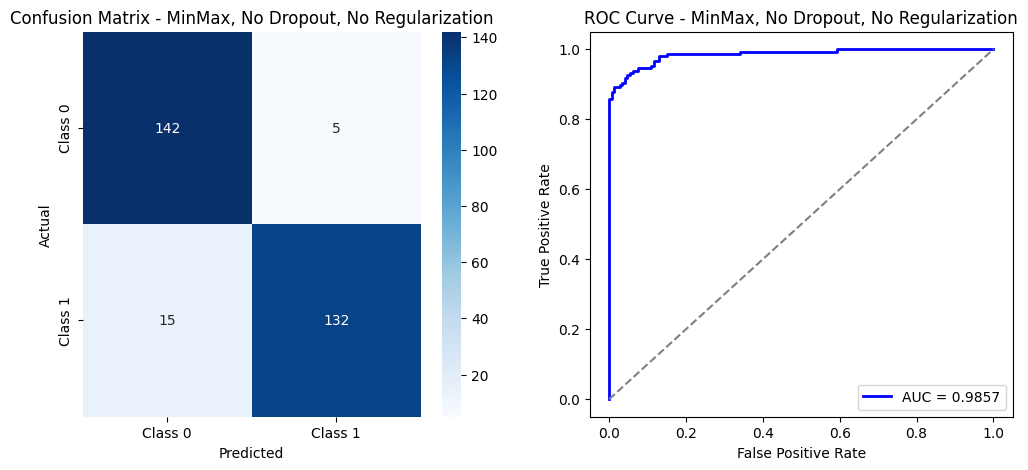

 **MinMax, No Dropout, No Regularization**
 Accuracy: 0.9320
 Precision: 0.9635
 Recall: 0.8980
 F1-Score: 0.9296
 AUC Score: 0.9857
--------------------------------------------------


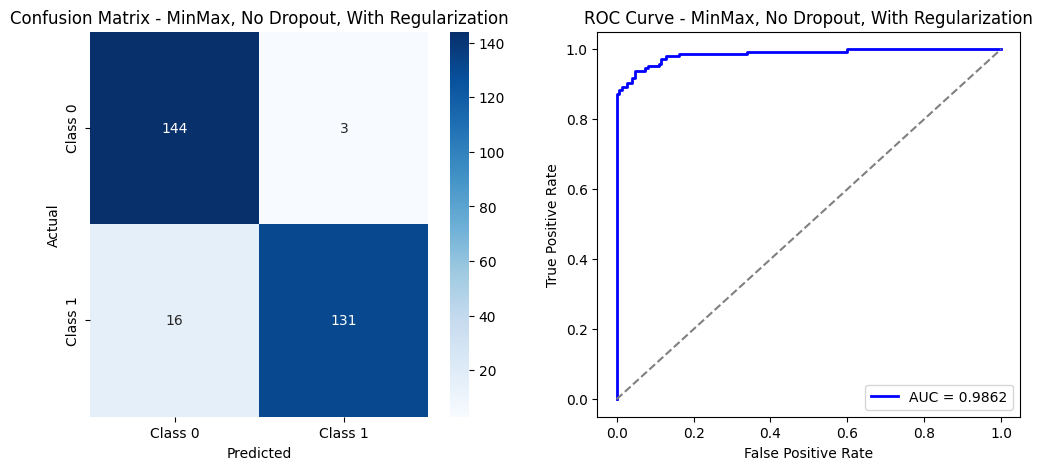

 **MinMax, No Dropout, With Regularization**
 Accuracy: 0.9354
 Precision: 0.9776
 Recall: 0.8912
 F1-Score: 0.9324
 AUC Score: 0.9862
--------------------------------------------------


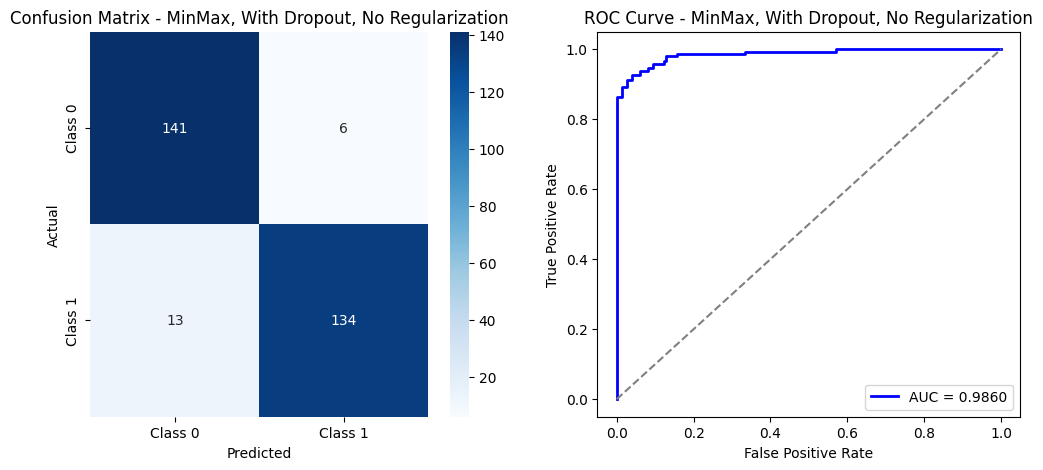

 **MinMax, With Dropout, No Regularization**
 Accuracy: 0.9354
 Precision: 0.9571
 Recall: 0.9116
 F1-Score: 0.9338
 AUC Score: 0.9860
--------------------------------------------------


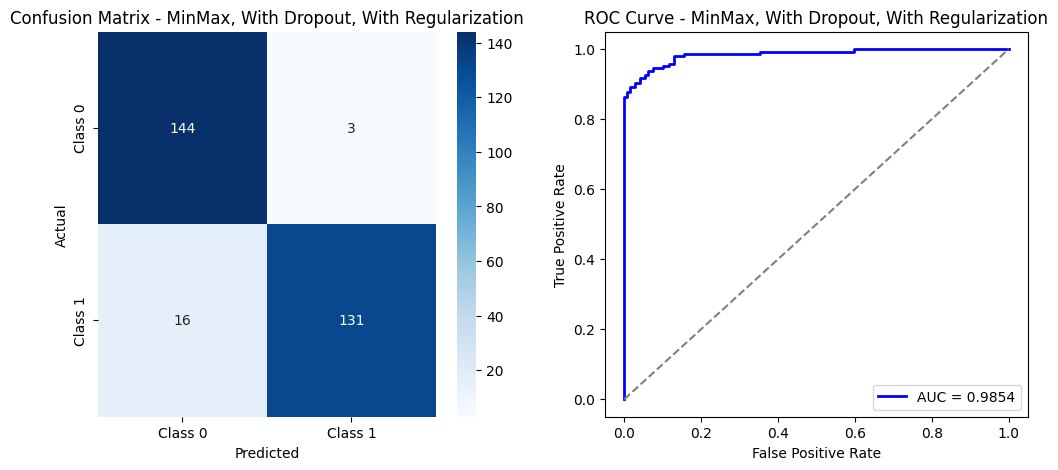

 **MinMax, With Dropout, With Regularization**
 Accuracy: 0.9354
 Precision: 0.9776
 Recall: 0.8912
 F1-Score: 0.9324
 AUC Score: 0.9854
--------------------------------------------------


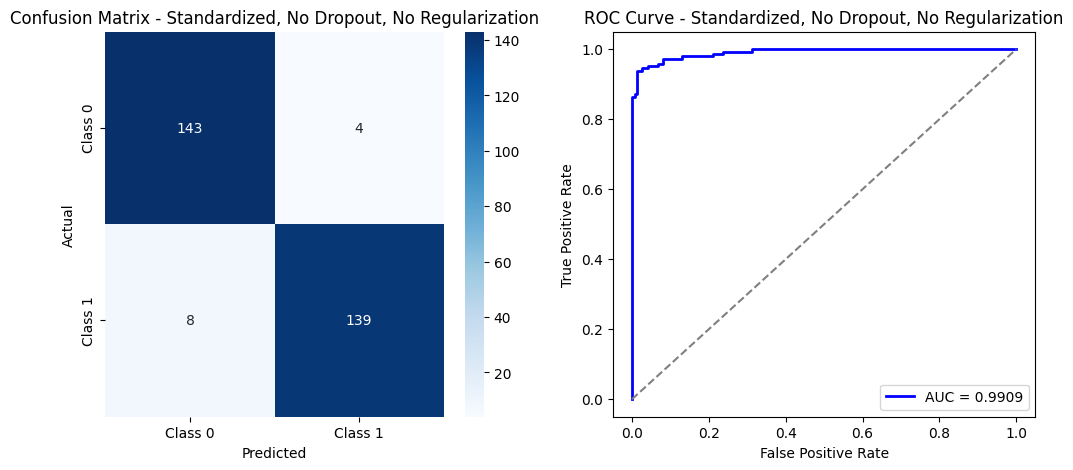

 **Standardized, No Dropout, No Regularization**
 Accuracy: 0.9592
 Precision: 0.9720
 Recall: 0.9456
 F1-Score: 0.9586
 AUC Score: 0.9909
--------------------------------------------------


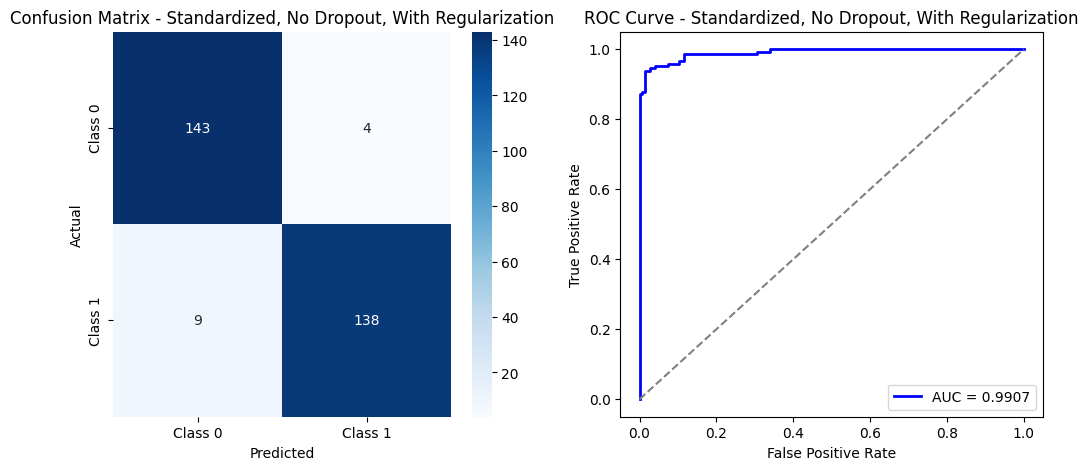

 **Standardized, No Dropout, With Regularization**
 Accuracy: 0.9558
 Precision: 0.9718
 Recall: 0.9388
 F1-Score: 0.9550
 AUC Score: 0.9907
--------------------------------------------------


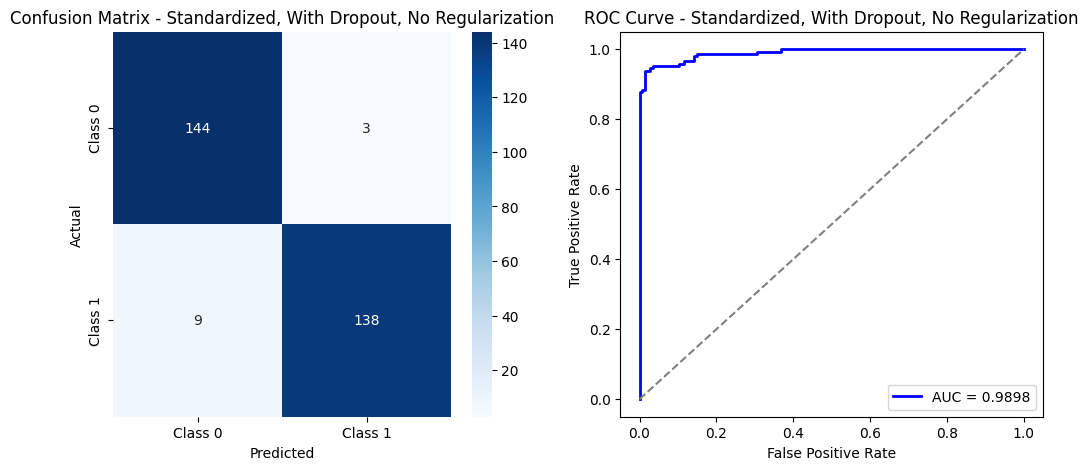

 **Standardized, With Dropout, No Regularization**
 Accuracy: 0.9592
 Precision: 0.9787
 Recall: 0.9388
 F1-Score: 0.9583
 AUC Score: 0.9898
--------------------------------------------------


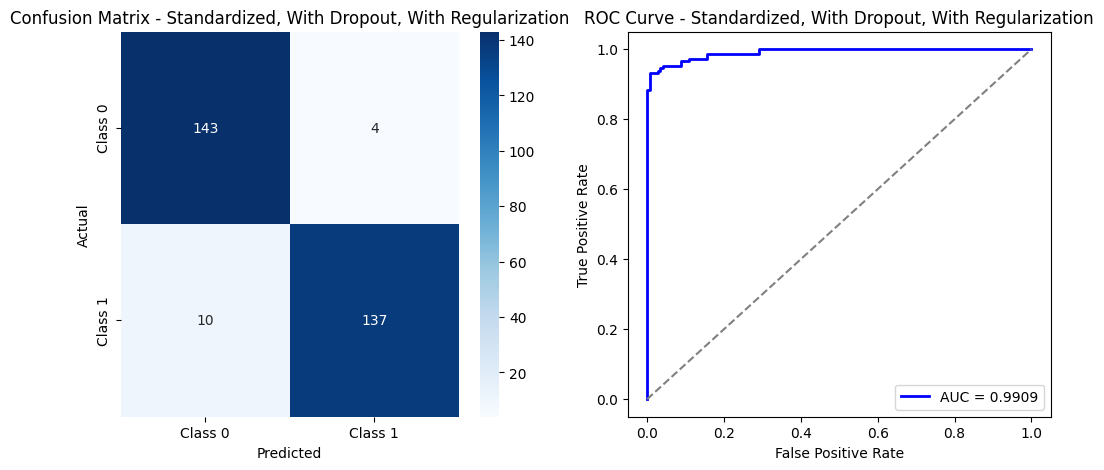

 **Standardized, With Dropout, With Regularization**
 Accuracy: 0.9524
 Precision: 0.9716
 Recall: 0.9320
 F1-Score: 0.9514
 AUC Score: 0.9909
--------------------------------------------------


Model  Accuracy  Precision  \
4      Standardized, No Dropout, No Regularization  0.959184   0.972028   
6    Standardized, With Dropout, No Regularization  0.959184   0.978723   
5    Standardized, No Dropout, With Regularization  0.955782   0.971831   
7  Standardized, With Dropout, With Regularization  0.952381   0.971631   
2          MinMax, With Dropout, No Regularization  0.935374   0.957143   
1          MinMax, No Dropout, With Regularization  0.935374   0.977612   
3        MinMax, With Dropout, With Regularization  0.935374   0.977612   
0            MinMax, No Dropout, No Regularization  0.931973   0.963504   

     Recall  F1-Score  AUC Score  
4  0.945578  0.958621   0.990930  
6  0.938776  0.958333   0.989773  
5  0.938776  0.955017   0.990698  
7  0.931973  0.951389   0.990930  
2  0.911565  0.933798   0.986024  
1  0.891156  0.932384   0.986163  
3  0.891156  0.932384   0.985423  
0  0.897959  0.929577   0.985654

In [32]:
X_test_minmax = torch.tensor(np.array(X_test_minmax), dtype=torch.float32).to(device)
X_test_standardized = torch.tensor(np.array(X_test_standardized), dtype=torch.float32).to(device)
y_test = torch.tensor(np.array(y_test), dtype=torch.float32).to(device)


test_configs = [
    (X_test_minmax, "MinMax, No Dropout, No Regularization"),
    (X_test_minmax, "MinMax, No Dropout, With Regularization"),
    (X_test_minmax, "MinMax, With Dropout, No Regularization"),
    (X_test_minmax, "MinMax, With Dropout, With Regularization"),
    (X_test_standardized, "Standardized, No Dropout, No Regularization"),
    (X_test_standardized, "Standardized, No Dropout, With Regularization"),
    (X_test_standardized, "Standardized, With Dropout, No Regularization"),
    (X_test_standardized, "Standardized, With Dropout, With Regularization")
]


results = []

for model, (X_test, desc) in zip(trained_models, test_configs):
    model.eval()
    with torch.no_grad():
        y_proba = model(X_test).cpu().numpy() 
        y_pred = (y_proba > 0.5).astype(int) 

    accuracy = accuracy_score(y_test.cpu().numpy(), y_pred)
    precision = precision_score(y_test.cpu().numpy(), y_pred)
    recall = recall_score(y_test.cpu().numpy(), y_pred)
    f1 = f1_score(y_test.cpu().numpy(), y_pred)

    cm = confusion_matrix(y_test.cpu().numpy(), y_pred)

    fpr, tpr, _ = roc_curve(y_test.cpu().numpy(), y_proba)
    roc_auc = auc(fpr, tpr)

    results.append([desc, accuracy, precision, recall, f1, roc_auc])

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"], ax=axes[0])
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")
    axes[0].set_title(f"Confusion Matrix - {desc}")

    axes[1].plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.4f}')
    axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--') 
    axes[1].set_xlabel("False Positive Rate")
    axes[1].set_ylabel("True Positive Rate")
    axes[1].set_title(f"ROC Curve - {desc}")
    axes[1].legend(loc="lower right")

    plt.show()

    print(f" **{desc}**")
    print(f" Accuracy: {accuracy:.4f}")
    print(f" Precision: {precision:.4f}")
    print(f" Recall: {recall:.4f}")
    print(f" F1-Score: {f1:.4f}")
    print(f" AUC Score: {roc_auc:.4f}")
    print("-" * 50)


df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC Score"])
df_results = df_results.sort_values(by="F1-Score", ascending=False)  

df_results



### part4 : Designing a deeper MLP network


Training model: MinMax, No Dropout, No Regularization


C:\Users\armin\AppData\Local\Temp\ipykernel_8908\3654355991.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  X_minmax_rf_selected = torch.tensor(np.array(X_minmax_rf_selected), dtype=torch.float32).to(device)
C:\Users\armin\AppData\Local\Temp\ipykernel_8908\3654355991.py:4: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  y_train = torch.tensor(np.array(y_train), dtype=torch.float32).to(device)
C:\Users\armin\AppData\Local\Temp\ipykernel_8908\3654355991.py:5: DeprecationWar

Epoch [10/40], Loss: 0.1421, Test Loss: 0.1347, Accuracy: 0.9525
Epoch [20/40], Loss: 0.1350, Test Loss: 0.1249, Accuracy: 0.9525
Epoch [30/40], Loss: 0.1235, Test Loss: 0.1227, Accuracy: 0.9550
Epoch [40/40], Loss: 0.1278, Test Loss: 0.1139, Accuracy: 0.9580
Best epoch for MinMax, No Dropout, No Regularization: 34


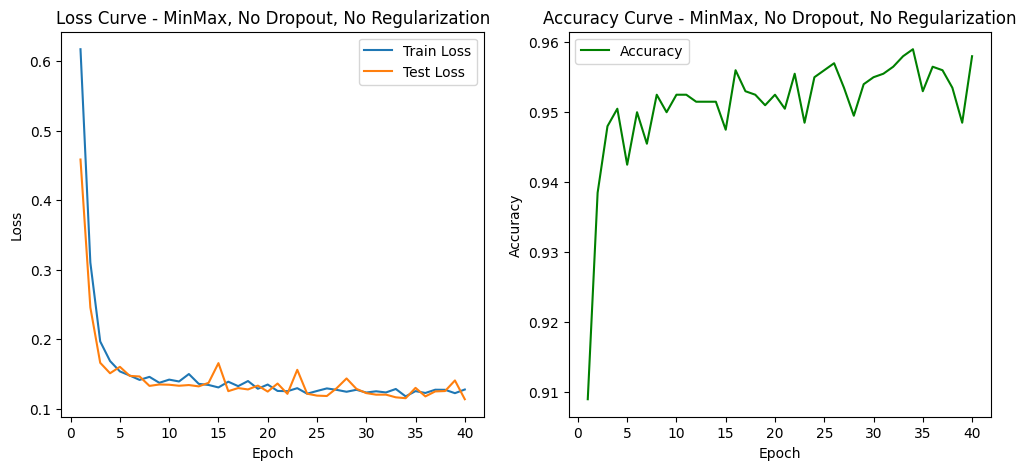


Training model: MinMax, No Dropout, With Regularization
Epoch [10/40], Loss: 0.1422, Test Loss: 0.1600, Accuracy: 0.9475
Epoch [20/40], Loss: 0.1281, Test Loss: 0.1266, Accuracy: 0.9555
Epoch [30/40], Loss: 0.1278, Test Loss: 0.1225, Accuracy: 0.9570
Epoch [40/40], Loss: 0.1198, Test Loss: 0.1372, Accuracy: 0.9505
Best epoch for MinMax, No Dropout, With Regularization: 39


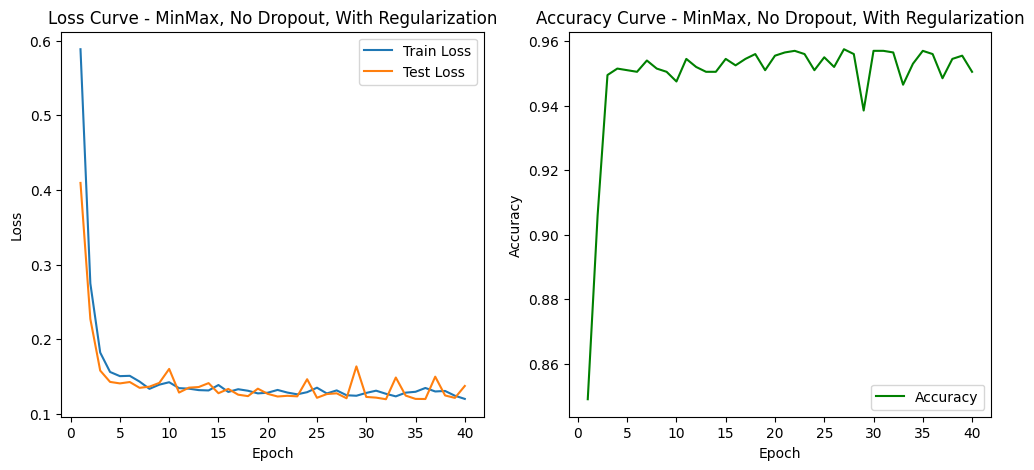


Training model: MinMax, With Dropout, No Regularization
Epoch [10/40], Loss: 0.1466, Test Loss: 0.1433, Accuracy: 0.9505
Epoch [20/40], Loss: 0.1402, Test Loss: 0.1209, Accuracy: 0.9565
Epoch [30/40], Loss: 0.1290, Test Loss: 0.1159, Accuracy: 0.9580
Epoch [40/40], Loss: 0.1212, Test Loss: 0.1128, Accuracy: 0.9580
Best epoch for MinMax, With Dropout, No Regularization: 35


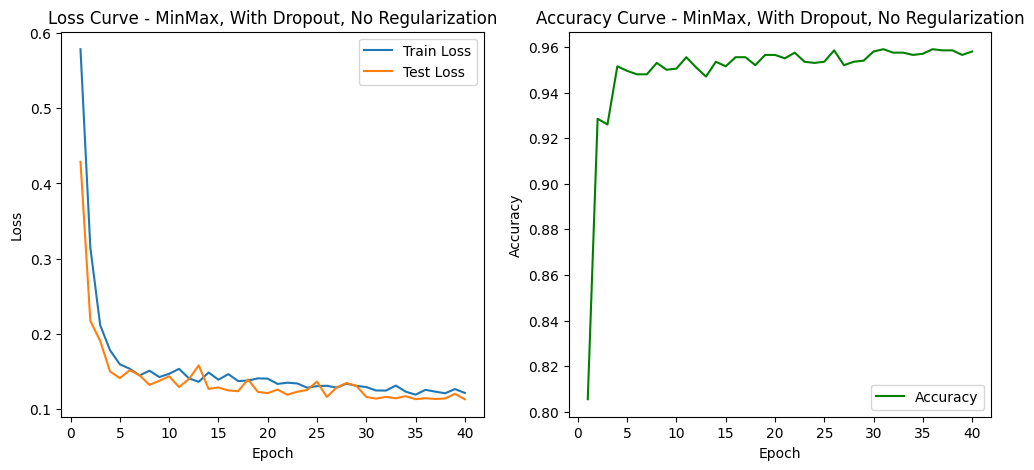


Training model: MinMax, With Dropout, With Regularization
Epoch [10/40], Loss: 0.1476, Test Loss: 0.1337, Accuracy: 0.9520
Epoch [20/40], Loss: 0.1357, Test Loss: 0.1245, Accuracy: 0.9560
Epoch [30/40], Loss: 0.1342, Test Loss: 0.1170, Accuracy: 0.9570
Epoch [40/40], Loss: 0.1195, Test Loss: 0.1174, Accuracy: 0.9590
Best epoch for MinMax, With Dropout, With Regularization: 40


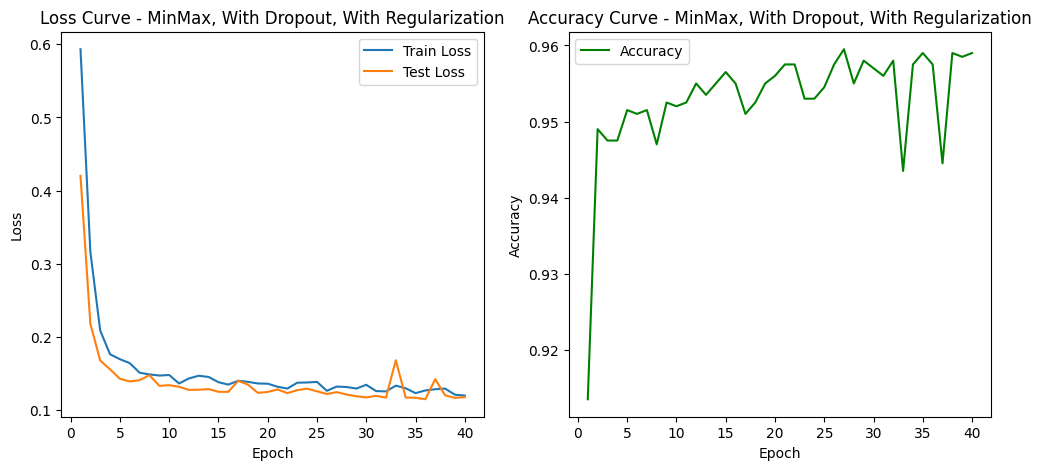


Training model: Standardized, No Dropout, No Regularization
Epoch [10/40], Loss: 0.0803, Test Loss: 0.0752, Accuracy: 0.9760
Epoch [20/40], Loss: 0.0503, Test Loss: 0.0425, Accuracy: 0.9855
Epoch [30/40], Loss: 0.0269, Test Loss: 0.0211, Accuracy: 0.9945
Epoch [40/40], Loss: 0.0149, Test Loss: 0.0112, Accuracy: 0.9980
Best epoch for Standardized, No Dropout, No Regularization: 40


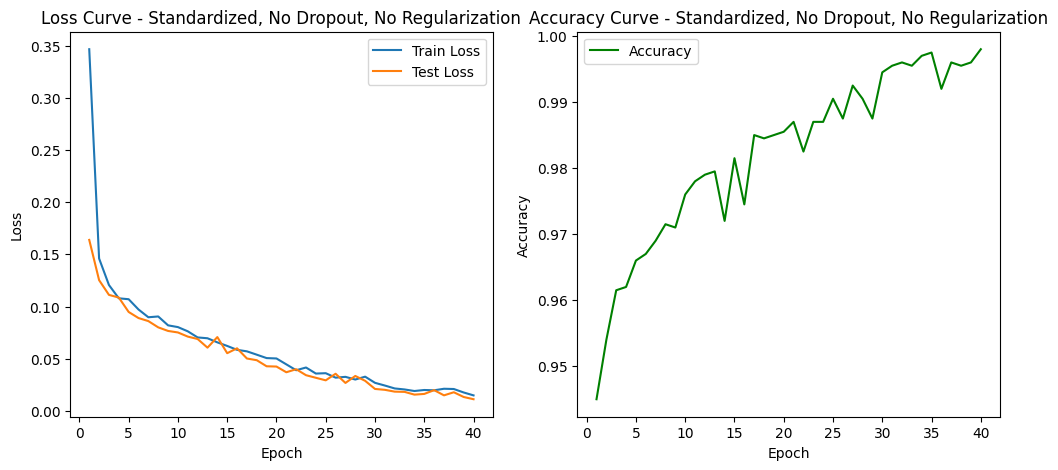


Training model: Standardized, No Dropout, With Regularization
Epoch [10/40], Loss: 0.0763, Test Loss: 0.0668, Accuracy: 0.9755
Epoch [20/40], Loss: 0.0418, Test Loss: 0.0397, Accuracy: 0.9845
Epoch [30/40], Loss: 0.0236, Test Loss: 0.0191, Accuracy: 0.9965
Epoch [40/40], Loss: 0.0139, Test Loss: 0.0100, Accuracy: 0.9985
Best epoch for Standardized, No Dropout, With Regularization: 40


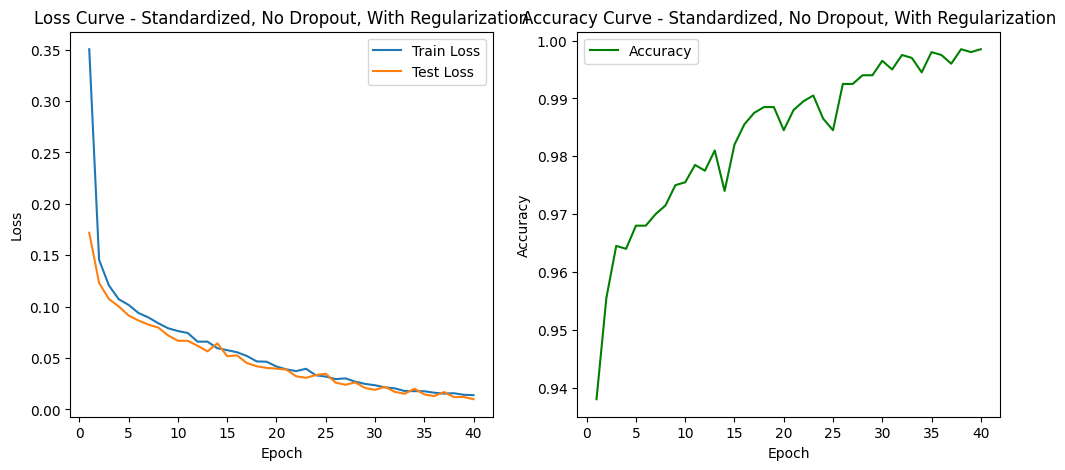


Training model: Standardized, With Dropout, No Regularization
Epoch [10/40], Loss: 0.0938, Test Loss: 0.0778, Accuracy: 0.9700
Epoch [20/40], Loss: 0.0658, Test Loss: 0.0554, Accuracy: 0.9840
Epoch [30/40], Loss: 0.0499, Test Loss: 0.0360, Accuracy: 0.9895
Epoch [40/40], Loss: 0.0362, Test Loss: 0.0242, Accuracy: 0.9930
Best epoch for Standardized, With Dropout, No Regularization: 40


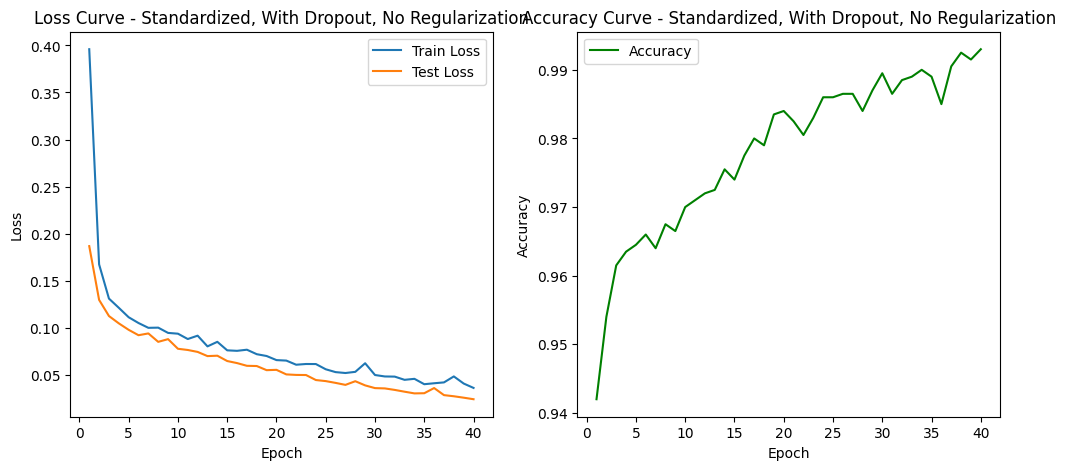


Training model: Standardized, With Dropout, With Regularization
Epoch [10/40], Loss: 0.0939, Test Loss: 0.0813, Accuracy: 0.9710
Epoch [20/40], Loss: 0.0682, Test Loss: 0.0556, Accuracy: 0.9790
Epoch [30/40], Loss: 0.0560, Test Loss: 0.0384, Accuracy: 0.9855
Epoch [40/40], Loss: 0.0358, Test Loss: 0.0272, Accuracy: 0.9930
Best epoch for Standardized, With Dropout, With Regularization: 40


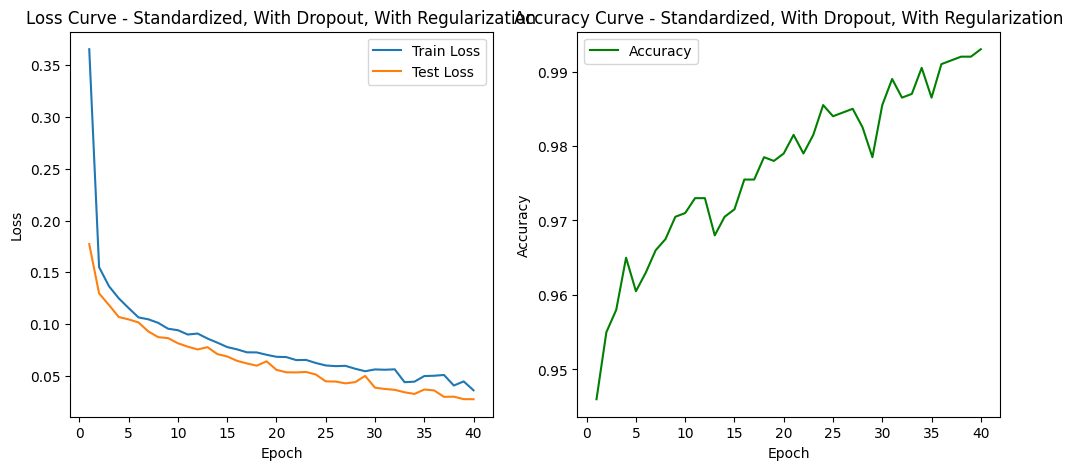

In [33]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_minmax_rf_selected = torch.tensor(np.array(X_minmax_rf_selected), dtype=torch.float32).to(device)
y_train = torch.tensor(np.array(y_train), dtype=torch.float32).to(device)
X_standardized_rf_selected = torch.tensor(np.array(X_standardized_rf_selected), dtype=torch.float32).to(device)


batch_size = 32

def create_dataloader(X, y):
    dataset = TensorDataset(X, y)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

train_loader_minmax = create_dataloader(X_minmax_rf_selected, y_train)
train_loader_standardized = create_dataloader(X_standardized_rf_selected, y_train)

class MLP(nn.Module):
    def __init__(self, use_dropout=False, use_l2=False):
        super(MLP, self).__init__()
        self.use_dropout = use_dropout
        self.l2 = 0.0001 if use_l2 else 0
        self.fc1 = nn.Linear(20, 128 )
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.2) if use_dropout else nn.Identity()
        self.fc2 = nn.Linear(128,64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.2) if use_dropout else nn.Identity()
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

def train_model(train_loader, use_dropout, use_l2, desc):
    print(f"\nTraining model: {desc}")
    model = MLP(use_dropout, use_l2).to(device)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), weight_decay=model.l2)
    
    train_losses, test_losses, accuracies = [], [], []
    best_epoch = 0
    min_combined_loss = float('inf')
    
    for epoch in range(40):
        model.train()
        epoch_loss = 0
        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(x_batch)
            loss = criterion(outputs, y_batch.unsqueeze(1))
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
        train_losses.append(epoch_loss / len(train_loader))
        
        model.eval()
        with torch.no_grad():
            test_loss = 0
            correct = 0
            total = 0
            for x_batch, y_batch in train_loader:
                x_batch, y_batch = x_batch.to(device), y_batch.to(device)
                test_outputs = model(x_batch)
                loss = criterion(test_outputs, y_batch.unsqueeze(1))
                test_loss += loss.item()
                correct += (test_outputs.round() == y_batch.unsqueeze(1)).float().sum().item()
                total += y_batch.size(0)
            
        test_losses.append(test_loss / len(train_loader))
        accuracies.append(correct / total)
        
        combined_loss = train_losses[-1] + test_losses[-1]
        if combined_loss < min_combined_loss:
            min_combined_loss = combined_loss
            best_epoch = epoch + 1
        
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/40], Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}, Accuracy: {accuracies[-1]:.4f}')
    
    print(f"Best epoch for {desc}: {best_epoch}")
    
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, 41), train_losses, label='Train Loss')
    plt.plot(range(1, 41), test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Loss Curve - {desc}')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(range(1, 41), accuracies, label='Accuracy', color='green')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy Curve - {desc}')
    plt.legend()
    
    plt.show()
    
    return model

configs = [
    (train_loader_minmax, False, False, "MinMax, No Dropout, No Regularization"),
    (train_loader_minmax, False, True, "MinMax, No Dropout, With Regularization"),
    (train_loader_minmax, True, False, "MinMax, With Dropout, No Regularization"),
    (train_loader_minmax, True, True, "MinMax, With Dropout, With Regularization"),
    (train_loader_standardized, False, False, "Standardized, No Dropout, No Regularization"),
    (train_loader_standardized, False, True, "Standardized, No Dropout, With Regularization"),
    (train_loader_standardized, True, False, "Standardized, With Dropout, No Regularization"),
    (train_loader_standardized, True, True, "Standardized, With Dropout, With Regularization")
]

trained_models = [train_model(loader, use_dropout, use_l2, desc) for loader, use_dropout, use_l2, desc in configs]


C:\Users\armin\AppData\Local\Temp\ipykernel_8908\4010939585.py:1: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  X_test_minmax = torch.tensor(np.array(X_test_minmax), dtype=torch.float32).to(device)
C:\Users\armin\AppData\Local\Temp\ipykernel_8908\4010939585.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  X_test_standardized = torch.tensor(np.array(X_test_standardized), dtype=torch.float32).to(device)
C:\Users\armin\AppData\Local\Temp\ipykernel_8908\4010939585.py:3: Depr

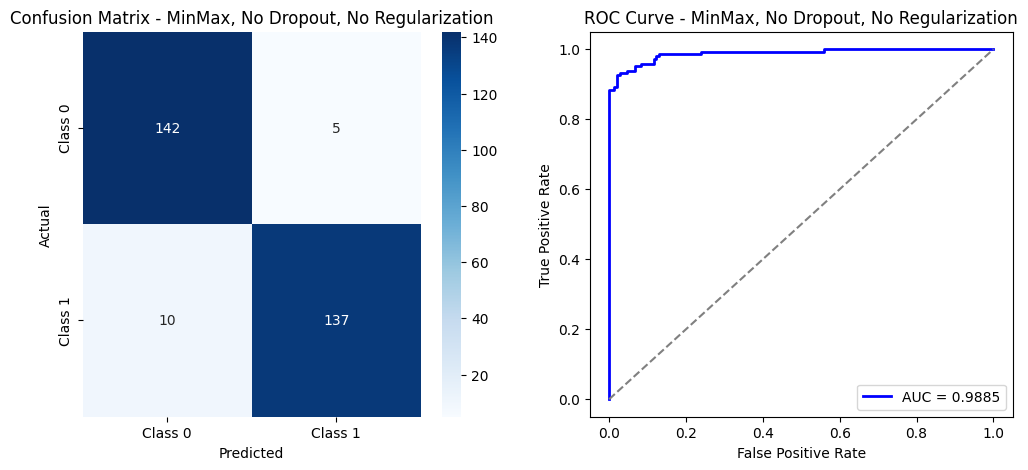

 **MinMax, No Dropout, No Regularization**
 Accuracy: 0.9490
 Precision: 0.9648
 Recall: 0.9320
 F1-Score: 0.9481
 AUC Score: 0.9885
--------------------------------------------------


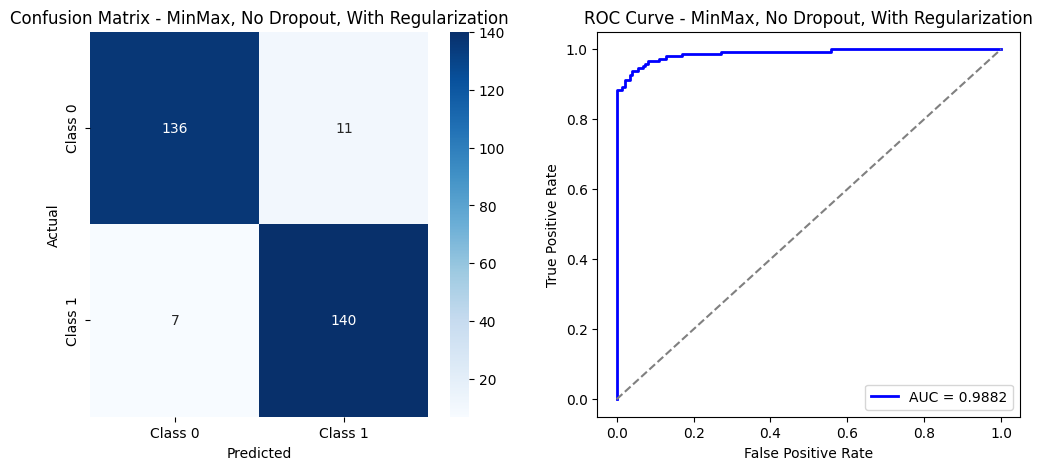

 **MinMax, No Dropout, With Regularization**
 Accuracy: 0.9388
 Precision: 0.9272
 Recall: 0.9524
 F1-Score: 0.9396
 AUC Score: 0.9882
--------------------------------------------------


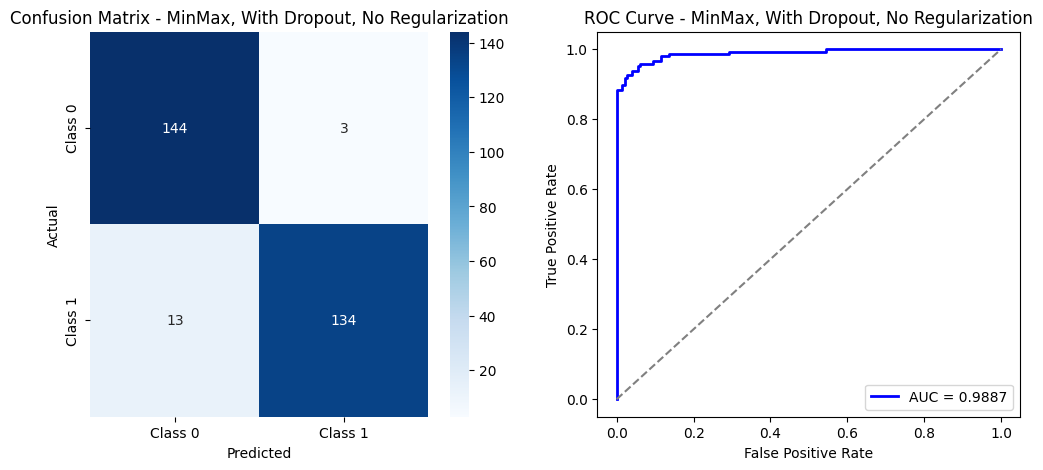

 **MinMax, With Dropout, No Regularization**
 Accuracy: 0.9456
 Precision: 0.9781
 Recall: 0.9116
 F1-Score: 0.9437
 AUC Score: 0.9887
--------------------------------------------------


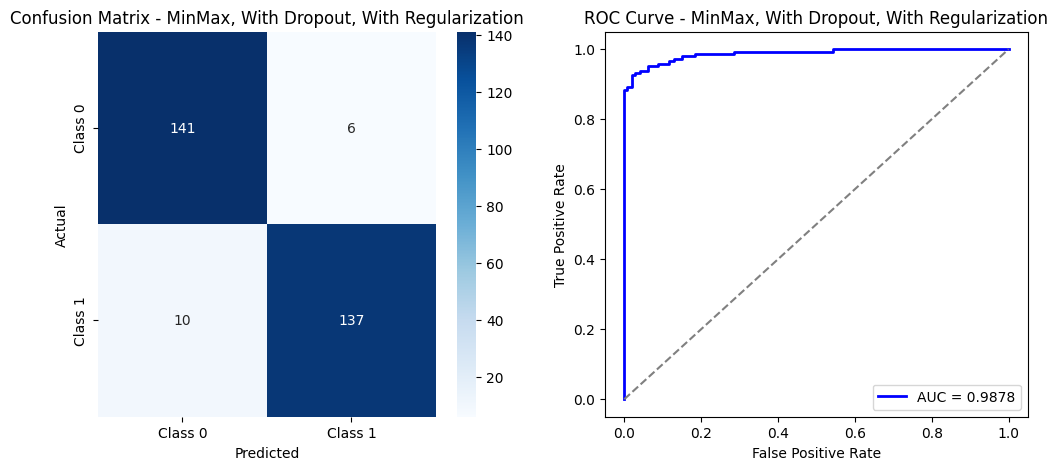

 **MinMax, With Dropout, With Regularization**
 Accuracy: 0.9456
 Precision: 0.9580
 Recall: 0.9320
 F1-Score: 0.9448
 AUC Score: 0.9878
--------------------------------------------------


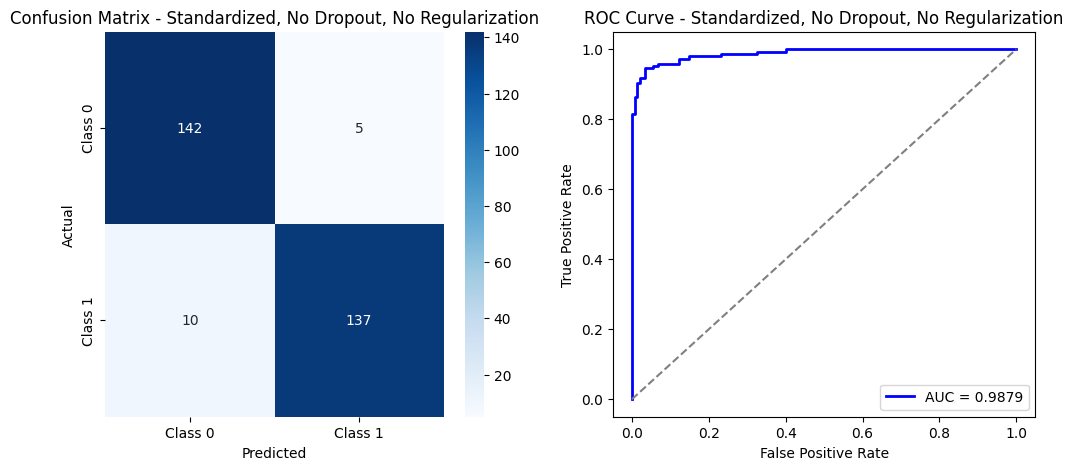

 **Standardized, No Dropout, No Regularization**
 Accuracy: 0.9490
 Precision: 0.9648
 Recall: 0.9320
 F1-Score: 0.9481
 AUC Score: 0.9879
--------------------------------------------------


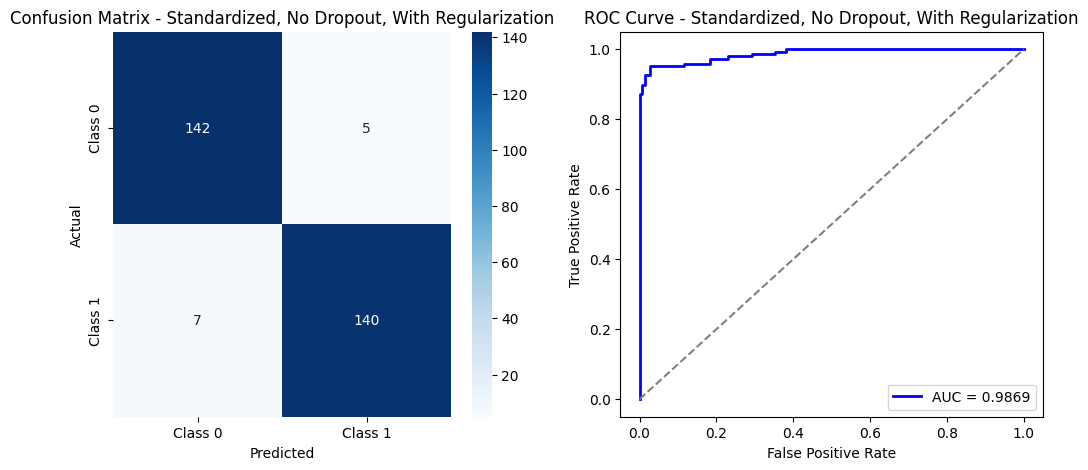

 **Standardized, No Dropout, With Regularization**
 Accuracy: 0.9592
 Precision: 0.9655
 Recall: 0.9524
 F1-Score: 0.9589
 AUC Score: 0.9869
--------------------------------------------------


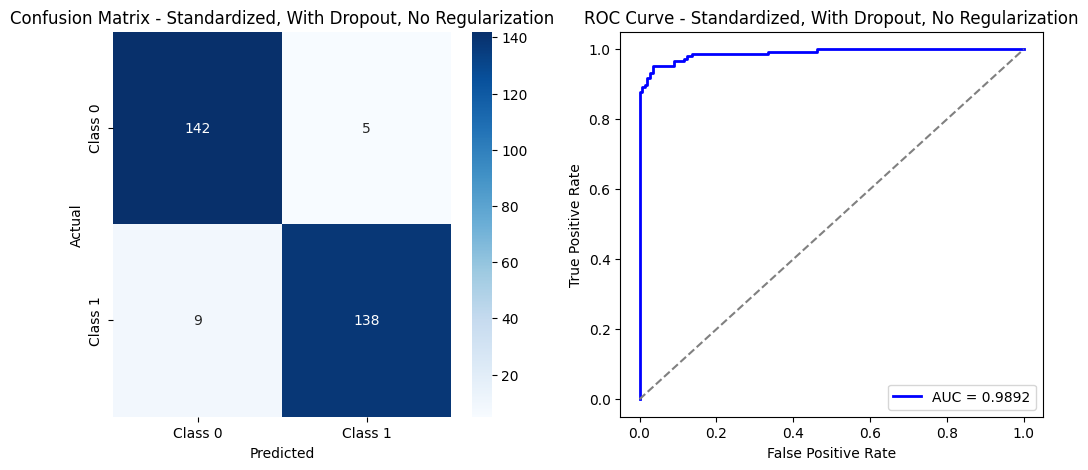

 **Standardized, With Dropout, No Regularization**
 Accuracy: 0.9524
 Precision: 0.9650
 Recall: 0.9388
 F1-Score: 0.9517
 AUC Score: 0.9892
--------------------------------------------------


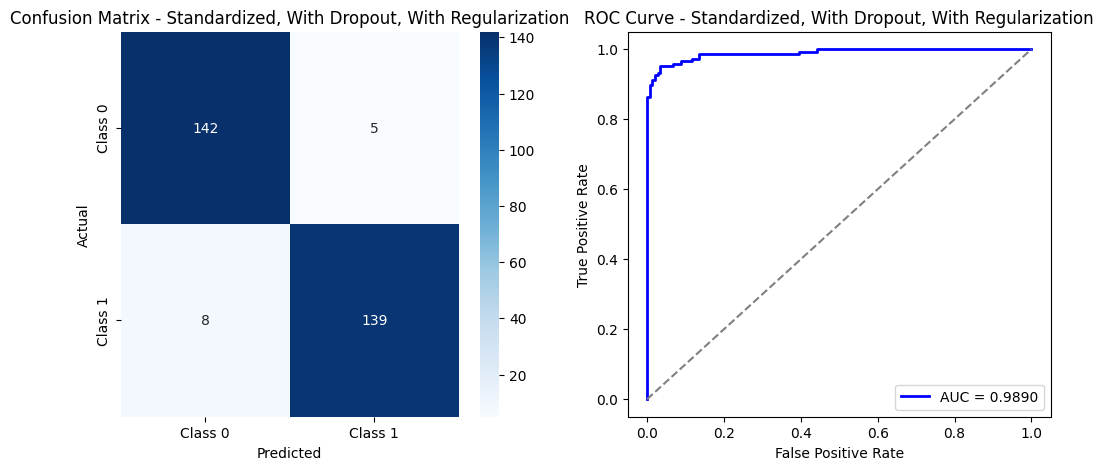

 **Standardized, With Dropout, With Regularization**
 Accuracy: 0.9558
 Precision: 0.9653
 Recall: 0.9456
 F1-Score: 0.9553
 AUC Score: 0.9890
--------------------------------------------------


Model  Accuracy  Precision  \
5    Standardized, No Dropout, With Regularization  0.959184   0.965517   
7  Standardized, With Dropout, With Regularization  0.955782   0.965278   
6    Standardized, With Dropout, No Regularization  0.952381   0.965035   
0            MinMax, No Dropout, No Regularization  0.948980   0.964789   
4      Standardized, No Dropout, No Regularization  0.948980   0.964789   
3        MinMax, With Dropout, With Regularization  0.945578   0.958042   
2          MinMax, With Dropout, No Regularization  0.945578   0.978102   
1          MinMax, No Dropout, With Regularization  0.938776   0.927152   

     Recall  F1-Score  AUC Score  
5  0.952381  0.958904   0.986857  
7  0.945578  0.955326   0.989032  
6  0.938776  0.951724   0.989171  
0  0.931973  0.948097   0.988523  
4  0.931973  0.948097   0.987875  
3  0.931973  0.944828   0.987783  
2  0.911565  0.943662   0.988662  
1  0.952381  0.939597   0.988153

In [34]:
X_test_minmax = torch.tensor(np.array(X_test_minmax), dtype=torch.float32).to(device)
X_test_standardized = torch.tensor(np.array(X_test_standardized), dtype=torch.float32).to(device)
y_test = torch.tensor(np.array(y_test), dtype=torch.float32).to(device)


test_configs = [
    (X_test_minmax, "MinMax, No Dropout, No Regularization"),
    (X_test_minmax, "MinMax, No Dropout, With Regularization"),
    (X_test_minmax, "MinMax, With Dropout, No Regularization"),
    (X_test_minmax, "MinMax, With Dropout, With Regularization"),
    (X_test_standardized, "Standardized, No Dropout, No Regularization"),
    (X_test_standardized, "Standardized, No Dropout, With Regularization"),
    (X_test_standardized, "Standardized, With Dropout, No Regularization"),
    (X_test_standardized, "Standardized, With Dropout, With Regularization")
]


results = []

for model, (X_test, desc) in zip(trained_models, test_configs):
    model.eval()
    with torch.no_grad():
        y_proba = model(X_test).cpu().numpy() 
        y_pred = (y_proba > 0.5).astype(int) 

    accuracy = accuracy_score(y_test.cpu().numpy(), y_pred)
    precision = precision_score(y_test.cpu().numpy(), y_pred)
    recall = recall_score(y_test.cpu().numpy(), y_pred)
    f1 = f1_score(y_test.cpu().numpy(), y_pred)

    cm = confusion_matrix(y_test.cpu().numpy(), y_pred)

    fpr, tpr, _ = roc_curve(y_test.cpu().numpy(), y_proba)
    roc_auc = auc(fpr, tpr)

    results.append([desc, accuracy, precision, recall, f1, roc_auc])

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"], ax=axes[0])
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")
    axes[0].set_title(f"Confusion Matrix - {desc}")

    axes[1].plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.4f}')
    axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--') 
    axes[1].set_xlabel("False Positive Rate")
    axes[1].set_ylabel("True Positive Rate")
    axes[1].set_title(f"ROC Curve - {desc}")
    axes[1].legend(loc="lower right")

    plt.show()

    print(f" **{desc}**")
    print(f" Accuracy: {accuracy:.4f}")
    print(f" Precision: {precision:.4f}")
    print(f" Recall: {recall:.4f}")
    print(f" F1-Score: {f1:.4f}")
    print(f" AUC Score: {roc_auc:.4f}")
    print("-" * 50)


df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC Score"])
df_results = df_results.sort_values(by="F1-Score", ascending=False)  

df_results



### part 5 : Searching for the best hyperparameters of a single hidden layer network using the greedy method

In [55]:
import itertools  # اضافه کردن این خط برای رفع خطا
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_minmax = torch.tensor(np.array(X_minmax_rf_selected), dtype=torch.float32)
X_train_standardized = torch.tensor(np.array(X_standardized_rf_selected), dtype=torch.float32)
y_train = torch.tensor(np.array(y_train), dtype=torch.float32)
X_test_minmax = torch.tensor(np.array(X_test_minmax), dtype=torch.float32)
X_test_standardized = torch.tensor(np.array(X_test_standardized), dtype=torch.float32)
y_test = torch.tensor(np.array(y_test), dtype=torch.float32)

class MLP(nn.Module):
    def __init__(self, hidden_size, dropout_rate, l2_reg):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(X_train_minmax.shape[1], hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

def create_dataloader(X, y, batch_size):
    dataset = TensorDataset(X, y)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

hidden_sizes = [64, 128, 256]
dropout_rates = [0.2, 0.3, 0.4]
l2_regs = [0.001, 0.0001]
batch_sizes = [16, 32, 64]

param_combinations = list(itertools.product(hidden_sizes, dropout_rates, l2_regs, batch_sizes))

results = []

for X_train, X_test, dataset_type in [(X_train_minmax, X_test_minmax, "MinMax"), (X_train_standardized, X_test_standardized, "Standardized")]:
    for hidden_size, dropout_rate, l2_reg, batch_size in param_combinations:
        
        train_loader = create_dataloader(X_train, y_train, batch_size)
        test_loader = create_dataloader(X_test, y_test, batch_size)
        
        model = MLP(hidden_size, dropout_rate, l2_reg).to(device)
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), weight_decay=l2_reg)
        
        for epoch in range(40):
            model.train()
            for x_batch, y_batch in train_loader:
                x_batch, y_batch = x_batch.to(device), y_batch.to(device)
                optimizer.zero_grad()
                outputs = model(x_batch)
                loss = criterion(outputs, y_batch.unsqueeze(1))
                loss.backward()
                optimizer.step()
        
        model.eval()
        y_proba_list = []
        y_true_list = []
        with torch.no_grad():
            for x_batch, y_batch in test_loader:
                x_batch = x_batch.to(device)
                y_proba = model(x_batch).cpu().numpy()
                y_proba_list.extend(y_proba)
                y_true_list.extend(y_batch.numpy())
        
        y_proba = np.array(y_proba_list)
        y_pred = (y_proba > 0.5).astype(int)
        
        accuracy = accuracy_score(y_true_list, y_pred)
        precision = precision_score(y_true_list, y_pred)
        recall = recall_score(y_true_list, y_pred)
        f1 = f1_score(y_true_list, y_pred)
        roc_auc = auc(*roc_curve(y_true_list, y_proba)[:2])
        
        results.append([dataset_type, hidden_size, dropout_rate, l2_reg, batch_size, accuracy, precision, recall, f1, roc_auc])

df_results = pd.DataFrame(results, columns=["Dataset", "Hidden Size", "Dropout Rate", "L2 Regularization", "Batch Size", "Accuracy", "Precision", "Recall", "F1-Score", "AUC Score"])
df_results = df_results.sort_values(by="F1-Score", ascending=False)

df_results

C:\Users\armin\AppData\Local\Temp\ipykernel_8908\2427091698.py:12: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  X_train_minmax = torch.tensor(np.array(X_minmax_rf_selected), dtype=torch.float32)
C:\Users\armin\AppData\Local\Temp\ipykernel_8908\2427091698.py:13: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  X_train_standardized = torch.tensor(np.array(X_standardized_rf_selected), dtype=torch.float32)
C:\Users\armin\AppData\Local\Temp\ipykernel_8908\2427091698.py:14: Depreca

Dataset  Hidden Size  Dropout Rate  L2 Regularization  Batch Size  \
93  Standardized          256           0.2             0.0001          16   
76  Standardized          128           0.2             0.0001          32   
78  Standardized          128           0.3             0.0010          16   
83  Standardized          128           0.3             0.0001          64   
73  Standardized          128           0.2             0.0010          32   
..           ...          ...           ...                ...         ...   
10        MinMax           64           0.3             0.0001          32   
7         MinMax           64           0.3             0.0010          32   
4         MinMax           64           0.2             0.0001          32   
53        MinMax          256           0.4             0.0001          64   
16        MinMax           64           0.4             0.0001          32   

    Accuracy  Precision    Recall  F1-Score  AUC Score  
93  0.959184   0.965517  0.952381  0.958904   0.988940  
76  0.959184   0.972028  0.945578  0.958621   0.990606  
78  0.959184   0.972028  0.945578  0.958621   0.990745  
83  0.959184   0.978723  0.938776  0.958333   0.990837  
73  0.959184   0.978723  0.938776  0.958333   0.990837  
..       ...        ...       ...       ...        ...  
10  0.931973   0.970370  0.891156  0.929078   0.985284  
7   0.931973   0.970370  0.891156  0.929078   0.986302  
4   0.931973   0.970370  0.891156  0.929078   0.985839  
53  0.931973   0.970370  0.891156  0.929078   0.986071  
16  0.928571   0.963235  0.891156  0.925795   0.985191  

[108 rows x 10 columns]

### part 7 : Comparison of MLP model with Logistic Regression model

Training Logistic Regression on MinMax data


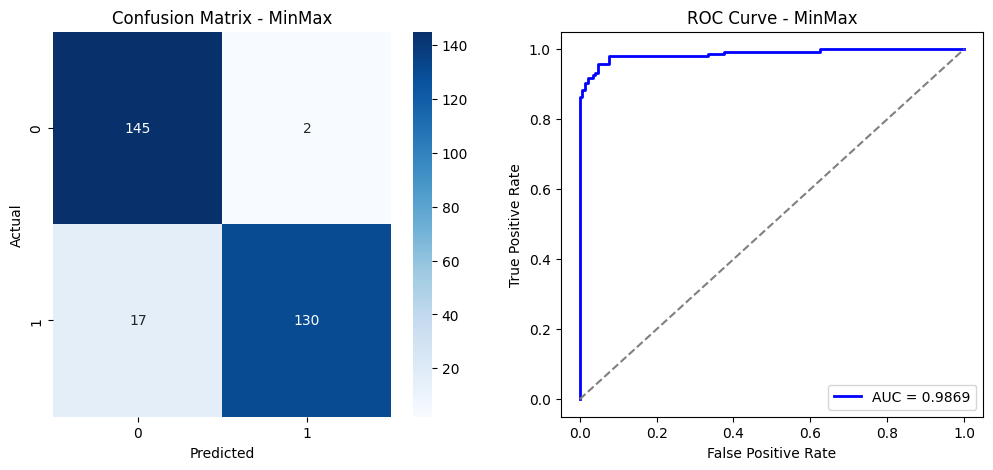

Training Logistic Regression on Standardized data


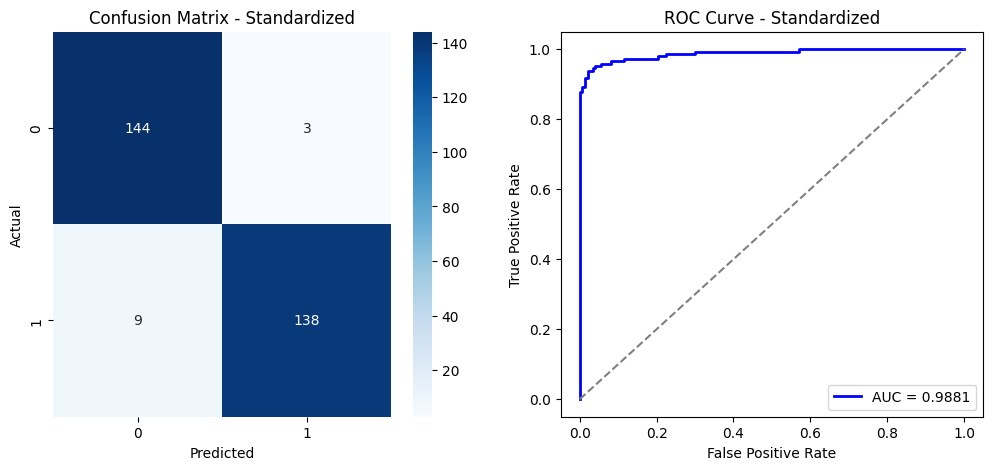

Dataset  Accuracy  Precision    Recall  F1-Score  AUC Score
1  Standardized  0.959184   0.978723  0.938776  0.958333   0.988061
0        MinMax  0.935374   0.984848  0.884354  0.931900   0.986904

In [56]:
results = []

def evaluate_logistic_regression(X_train, X_test, y_train, y_test, dataset_type):
    print(f"Training Logistic Regression on {dataset_type} data")
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    
    y_proba = clf.predict_proba(X_test)[:, 1]
    y_pred = (y_proba > 0.5).astype(int)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    results.append([dataset_type, accuracy, precision, recall, f1, roc_auc])

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[0])
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")
    axes[0].set_title(f"Confusion Matrix - {dataset_type}")
    
    axes[1].plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.4f}')
    axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
    axes[1].set_xlabel("False Positive Rate")
    axes[1].set_ylabel("True Positive Rate")
    axes[1].set_title(f"ROC Curve - {dataset_type}")
    axes[1].legend(loc="lower right")
    plt.show()

evaluate_logistic_regression(X_minmax_rf_selected.numpy(), X_test_minmax.numpy(), y_train.numpy(), y_test.numpy(), "MinMax")
evaluate_logistic_regression(X_standardized_rf_selected.numpy(), X_test_standardized.numpy(), y_train.numpy(), y_test.numpy(), "Standardized")

df_results = pd.DataFrame(results, columns=["Dataset", "Accuracy", "Precision", "Recall", "F1-Score", "AUC Score"])
df_results = df_results.sort_values(by="F1-Score", ascending=False)
df_results
